In [1]:
# For using custom module.
import sys
sys.path.append('../custom_library')

In [2]:
import spacy
from nltk.corpus import stopwords 
from nltk.stem.wordnet import WordNetLemmatizer
import string
import numpy as np
import pandas as pd 
import connect_to_db as cn
from gensim import corpora
import gensim
import csv
import parmap
import matplotlib.pyplot as plt
from gensim.models import Word2Vec
import seaborn as sns
import pymysql.cursors
import pandas as pd
import numpy as np
import connect_to_db as cn
import json
from itertools import combinations
from sklearn.feature_extraction.text import TfidfVectorizer
import re
import csv
import parmap
import random

/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:52: UserWarning: CUDA initialization: Unexpected error from cudaGetDeviceCount(). Did you run some cuda functions before calling NumCudaDevices() that might have already set an error? Error 804: forward compatibility was attempted on non supported HW (Triggered internally at  /pytorch/c10/cuda/CUDAFunctions.cpp:109.)
  return torch._C._cuda_getDeviceCount() > 0
2022-05-31 14:34:13.103637: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0


In [22]:
sql = "select community_id_fastgreedy_is, count(*) from nodes group by community_id_fastgreedy_is having count(*) > 2 order by count(*) asc;"
result_df = cn.select_query_result_to_df(sql)
# communities = list(np.array(result_df['community_id_fastgreedy_is'].values.tolist()))

In [30]:
for i in range(len(result_df)):
    if result_df['community_id_fastgreedy_is'][i] == 1:
        print(result_df['count(*)'][i])

152391


In [3]:
from os import listdir

def find_csv_filenames(path_to_dir, suffix=".csv" ):
    filenames = listdir(path_to_dir)
    return [ filename for filename in filenames if filename.endswith( suffix ) ]

filenames = find_csv_filenames("../lda/csv/lda_results/nodes/posts/topic_words_stop_words_removed_same_topic_num_20_for_tsne")

communities = []

for name in filenames:
    communities.append(name.split('_')[1])

In [4]:
print(len(communities))

8228


# union topic words

In [40]:
filenames_filtered = []
all_tw = []
for filename in filenames:
    with open(f'../lda/csv/lda_results/nodes/posts/topic_words_stop_words_removed_same_topic_num_20_for_tsne/{filename}', newline='') as f:
        reader = csv.reader(f)
        topics = list(reader)
        if len(topics[0]) != 20:
            continue
        filenames_filtered.append(filename)
        topics = list(set(sum(topics, []))) 
        all_tw.append(topics)

print(all_tw)

[['need', 'forward', 'bath', 'today', 'female', 'up', 'fucked', 'asap', 'old', 'support', 'goodbye', 'time', 'clean', 'age', 'talk', 'path', 'everybody', 'mother', 'btw', 'whats'], ['day', 'dad', 'made', 'friend', 'hate', 'never', 'need', 'mom', 'today', 'love', 'think', 'life', 'first', 'stop', 'woman', 'time', 'year', 'fuck', 'one', 'boyfriend'], ['even', 'suicidal', 'depressed', 'sudden', 'supporttips', 'sad', 'lonely', 'heartbroken', 'focused', 'well', 'depression', 'world', 'somebody', 'illness', 'again', 'thought', 'talk', 'start', 'body', 'to'], ['almost', 'tired', 'died', 'sad', 'interest', 'lonely', 'this', 'depression', 'pound', 'girlfriend', 'nobody', 'time', 'living', 'gained', 'stretch', 'seems', 'everyday', 'lost', 'root', 'quarantine'], ['selfharm', 'needed', 'hate', 'happy', 'used', 'absolutely', 'alone', 'therapy', 'free', 'trigger', 'life', 'went', 'too', 'could', 'question', 'vent', 'wrong', 'quitter', 'one', 'warning'], ['dad', 'friend', 'week', 'unexpectedly', 'lig

In [41]:
mean_vector_list = []
topics_num = []

# print(all_tw)

model = Word2Vec(all_tw, min_count=1)

for filename in filenames_filtered:
    with open(f'../lda/csv/lda_results/nodes/posts/topic_words_stop_words_removed_same_topic_num_20_for_tsne/{filename}', newline='') as f:
        reader = csv.reader(f)
        tws = list(reader)
        topics_num.append(len(tws))
        
        tws = sum(tws, [])
        # print(tws)
        
        word_vector_list = []
        mean_vector = []
        word_vectors = model.wv
        
        for tw in tws:
            word_vector_list.append(word_vectors[tw].tolist())
        
        for element in zip(*word_vector_list):
            mean_vector.append(float(np.mean(element)))
        
        mean_vector_list.append(mean_vector)

In [42]:
print(mean_vector_list[0][0])

-0.1453271780454088


In [43]:
# convert list to np.array
mean_vector_array = np.array(mean_vector_list)
print(mean_vector_array)

[[-0.14532718  0.20965323  0.10089613 ... -0.26214021  0.05226463
   0.03927367]
 [-0.31171766  0.43615477  0.22493966 ... -0.56423932  0.10169739
   0.08317169]
 [-0.18379272  0.26156595  0.13243137 ... -0.33522285  0.05995797
   0.04617277]
 ...
 [-0.14472081  0.20775704  0.09974325 ... -0.26496652  0.05412858
   0.03983206]
 [-0.06519851  0.08903503  0.04249304 ... -0.11543516  0.02472797
   0.01776974]
 [-0.16984778  0.23918741  0.11733541 ... -0.30797654  0.056797
   0.04676617]]


## t-SNE

In [44]:
from sklearn.manifold import TSNE

data = mean_vector_array
print(type(data))
print(data)
# n_components = 2

# model = TSNE(n_components=n_components)
# print(model.fit_transform(data))

plt.rc('axes', unicode_minus=False)
tsne = TSNE(random_state = 42)
data_tsne = tsne.fit_transform(data)
print(data_tsne)

<class 'numpy.ndarray'>
[[-0.14532718  0.20965323  0.10089613 ... -0.26214021  0.05226463
   0.03927367]
 [-0.31171766  0.43615477  0.22493966 ... -0.56423932  0.10169739
   0.08317169]
 [-0.18379272  0.26156595  0.13243137 ... -0.33522285  0.05995797
   0.04617277]
 ...
 [-0.14472081  0.20775704  0.09974325 ... -0.26496652  0.05412858
   0.03983206]
 [-0.06519851  0.08903503  0.04249304 ... -0.11543516  0.02472797
   0.01776974]
 [-0.16984778  0.23918741  0.11733541 ... -0.30797654  0.056797
   0.04676617]]
[[ 44.09522     8.518393 ]
 [-23.135475   50.69744  ]
 [-37.046448  -15.668369 ]
 ...
 [ 43.590828    6.9486217]
 [ 17.798672  -78.26442  ]
 [ -2.5207794  17.839537 ]]


In [46]:
topics_num = []

In [47]:
for filename in filenames_filtered:
    for i in range(len(result_df)):
        if int(filename.split('_')[1]) == result_df['community_id_fastgreedy_is'][i]:
            count = result_df['count(*)'][i]
            if count >= 10000:
                topics_num.append(10)
            elif count >= 1000:
                topics_num.append(5)
            elif count >= 100:
                topics_num.append(4)
            elif count >= 10:
                topics_num.append(3)
            else:
                topics_num.append(1)
            break

In [38]:
for f, n in zip(filenames_filtered, topics_num):
    print(f, n)

community_879_topics_20_words.csv 1
community_1_topics_20_words.csv 10
community_944_topics_20_words.csv 3
community_13842_topics_20_words.csv 1
community_15395_topics_20_words.csv 1
community_3614_topics_20_words.csv 3
community_223_topics_20_words.csv 1
community_1759_topics_20_words.csv 1
community_7390_topics_20_words.csv 1
community_19626_topics_20_words.csv 1
community_632_topics_20_words.csv 1
community_2572_topics_20_words.csv 1
community_6120_topics_20_words.csv 1
community_7460_topics_20_words.csv 3
community_18878_topics_20_words.csv 1
community_988_topics_20_words.csv 3
community_14275_topics_20_words.csv 1
community_14710_topics_20_words.csv 1
community_3427_topics_20_words.csv 3
community_8716_topics_20_words.csv 1
community_1449_topics_20_words.csv 3
community_10328_topics_20_words.csv 1
community_4824_topics_20_words.csv 1
community_2034_topics_20_words.csv 1
community_460_topics_20_words.csv 1
community_626_topics_20_words.csv 1
community_6391_topics_20_words.csv 1
com

In [48]:
print(len(data))
print(len(topics_num))

print(topics_num)

2520
2520
[1, 10, 3, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 3, 1, 3, 1, 1, 3, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 3, 3, 1, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 3, 1, 1, 1, 1, 4, 3, 1, 3, 1, 1, 1, 1, 3, 1, 3, 1, 3, 3, 3, 3, 1, 1, 1, 1, 3, 1, 3, 1, 1, 1, 1, 3, 3, 1, 3, 3, 1, 3, 3, 3, 1, 1, 1, 3, 1, 1, 1, 3, 1, 1, 1, 1, 1, 3, 1, 1, 1, 3, 1, 3, 1, 3, 3, 3, 1, 1, 3, 1, 1, 1, 3, 1, 1, 3, 1, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 3, 3, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 3, 3, 3, 3, 1, 1, 3, 1, 1, 3, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 3, 3, 3, 1, 3, 3, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 3, 1, 3, 3, 3, 1, 3, 1, 1, 3, 1, 1, 1, 3, 3, 3, 3, 1, 1, 1, 1, 3, 3, 1, 3, 1, 3, 1, 1, 1, 1, 1, 3, 3, 1, 3, 1, 1, 1, 4, 1, 3, 3, 1, 3, 1, 1, 1, 3, 3, 3, 1, 3, 1, 3, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 3, 1, 1, 3, 1, 1, 1, 1

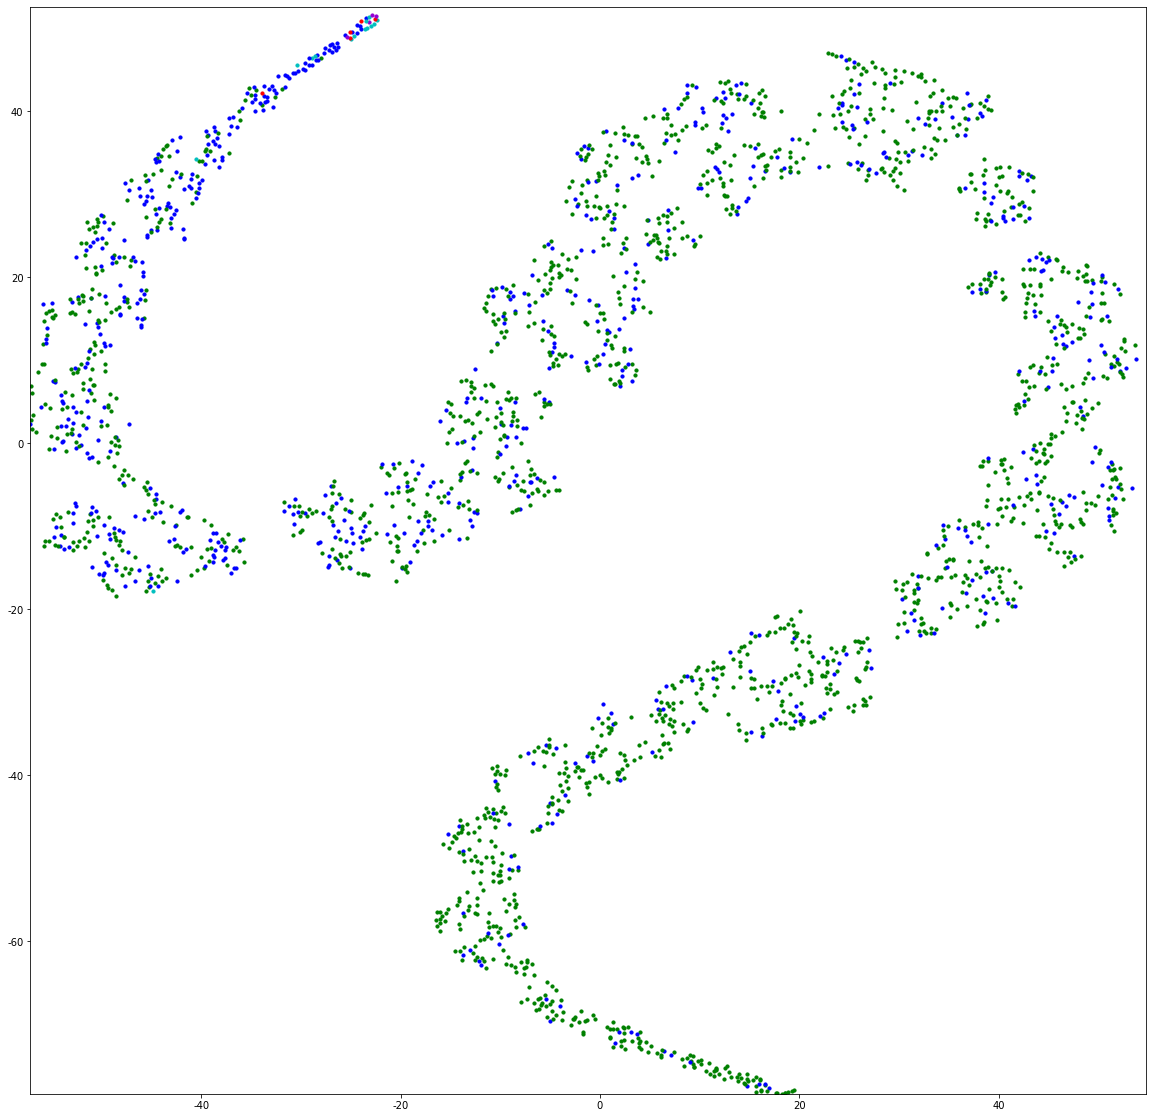

In [49]:
plt.figure(figsize=(20,20))
plt.xlim(data_tsne[:,0].min(), data_tsne[:,0].max()+1)
plt.ylim(data_tsne[:,1].min(), data_tsne[:,1].max()+1)
for i in range(len(data)):
    if topics_num[i] == 10:
        color = 'darkviolet'
    elif topics_num[i] == 5:
        color = 'r'
    elif topics_num[i] == 4:
        color = 'c'
    elif topics_num[i] == 3:
        color = 'b'
    else:
        color = 'g'
        
    size = 10
    plt.scatter(data_tsne[i,0], data_tsne[i,1], c=color, s=size)
plt.show()

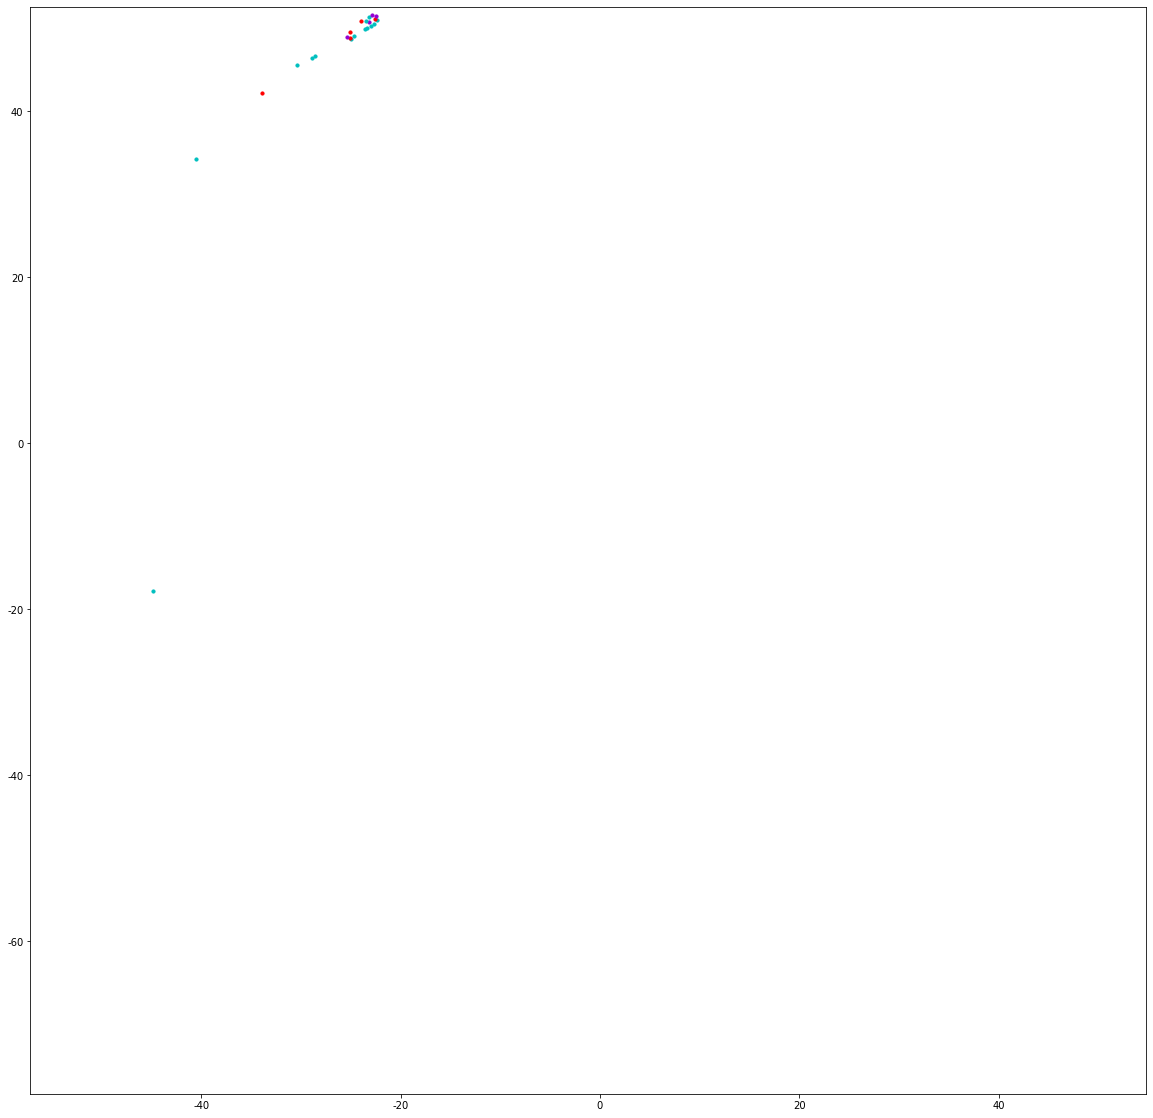

In [116]:
plt.figure(figsize=(20,20))
plt.xlim(data_tsne[:,0].min(), data_tsne[:,0].max()+1)
plt.ylim(data_tsne[:,1].min(), data_tsne[:,1].max()+1)
for i in range(len(data)):
    if topics_num[i] == 10:
        color = 'darkviolet'
    elif topics_num[i] == 5:
        color = 'r'
    elif topics_num[i] == 4:
        color = 'c'
    else:
        continue
        
    size = 10
    plt.scatter(data_tsne[i,0], data_tsne[i,1], c=color, s=size)
plt.show()

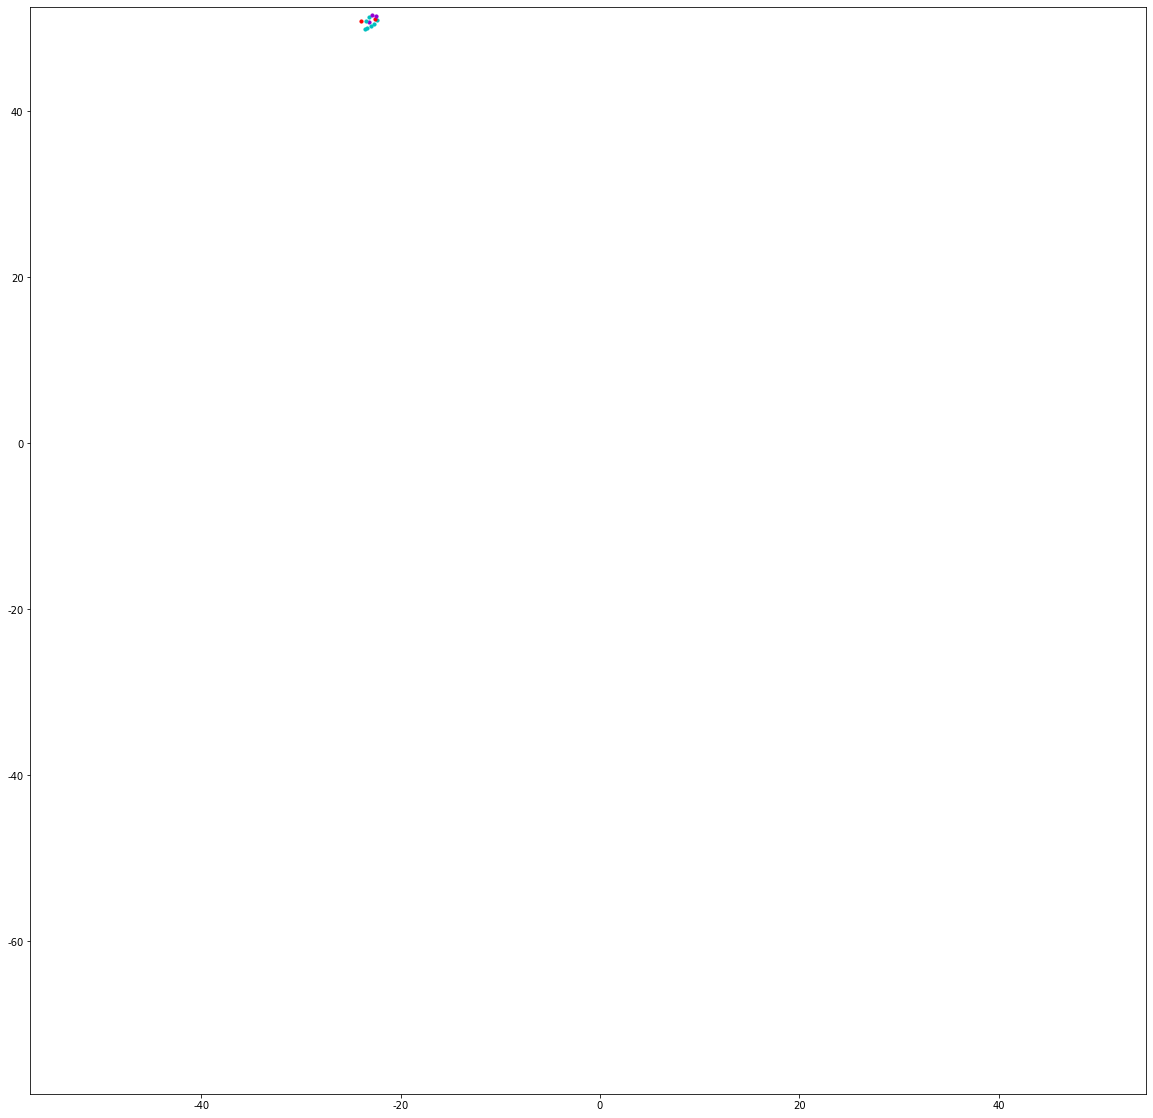

In [120]:
communities = []

plt.figure(figsize=(20,20))
plt.xlim(data_tsne[:,0].min(), data_tsne[:,0].max()+1)
plt.ylim(data_tsne[:,1].min(), data_tsne[:,1].max()+1)

for i in range(len(data)):
    if data_tsne[i,0] > -24:
        if topics_num[i] == 10:
            color = 'darkviolet'
        elif topics_num[i] == 5:
            color = 'red'
        elif topics_num[i] == 4:
            color = 'c'
        else:
            continue
        plt.scatter(data_tsne[i,0], data_tsne[i,1], c=color, s=size)
        
        communities.append(filenames_filtered[i])

In [121]:
word_count_and_tf_idf_similarity(communities)

[('need', 1.0),
 ('life', 1.0),
 ('think', 0.8333),
 ('depression', 0.8333),
 ('day', 0.75),
 ('friend', 0.75),
 ('hate', 0.75),
 ('die', 0.6667),
 ('time', 0.6667),
 ('year', 0.6667),
 ('depressed', 0.6667),
 ('today', 0.6667),
 ('one', 0.5833),
 ('talk', 0.5),
 ('feeling', 0.5),
 ('suicide', 0.4167),
 ('kill', 0.4167),
 ('go', 0.3333),
 ('alone', 0.3333),
 ('thought', 0.3333),
 ('never', 0.3333),
 ('tired', 0.25),
 ('lonely', 0.25),
 ('better', 0.25),
 ('stop', 0.25),
 ('love', 0.25),
 ('even', 0.1667),
 ('care', 0.1667),
 ('ive', 0.1667),
 ('nothing', 0.1667),
 ('last', 0.1667),
 ('mom', 0.1667),
 ('anxiety', 0.1667),
 ('made', 0.1667),
 ('advice', 0.1667),
 ('fuck', 0.1667),
 ('always', 0.0833),
 ('scared', 0.0833),
 ('end', 0.0833),
 ('actually', 0.0833),
 ('good', 0.0833),
 ('tell', 0.0833),
 ('job', 0.0833),
 ('done', 0.0833),
 ('death', 0.0833),
 ('social', 0.0833),
 ('mind', 0.0833),
 ('say', 0.0833),
 ('tonight', 0.0833),
 ('find', 0.0833),
 ('anxious', 0.0833),
 ('worse', 0.

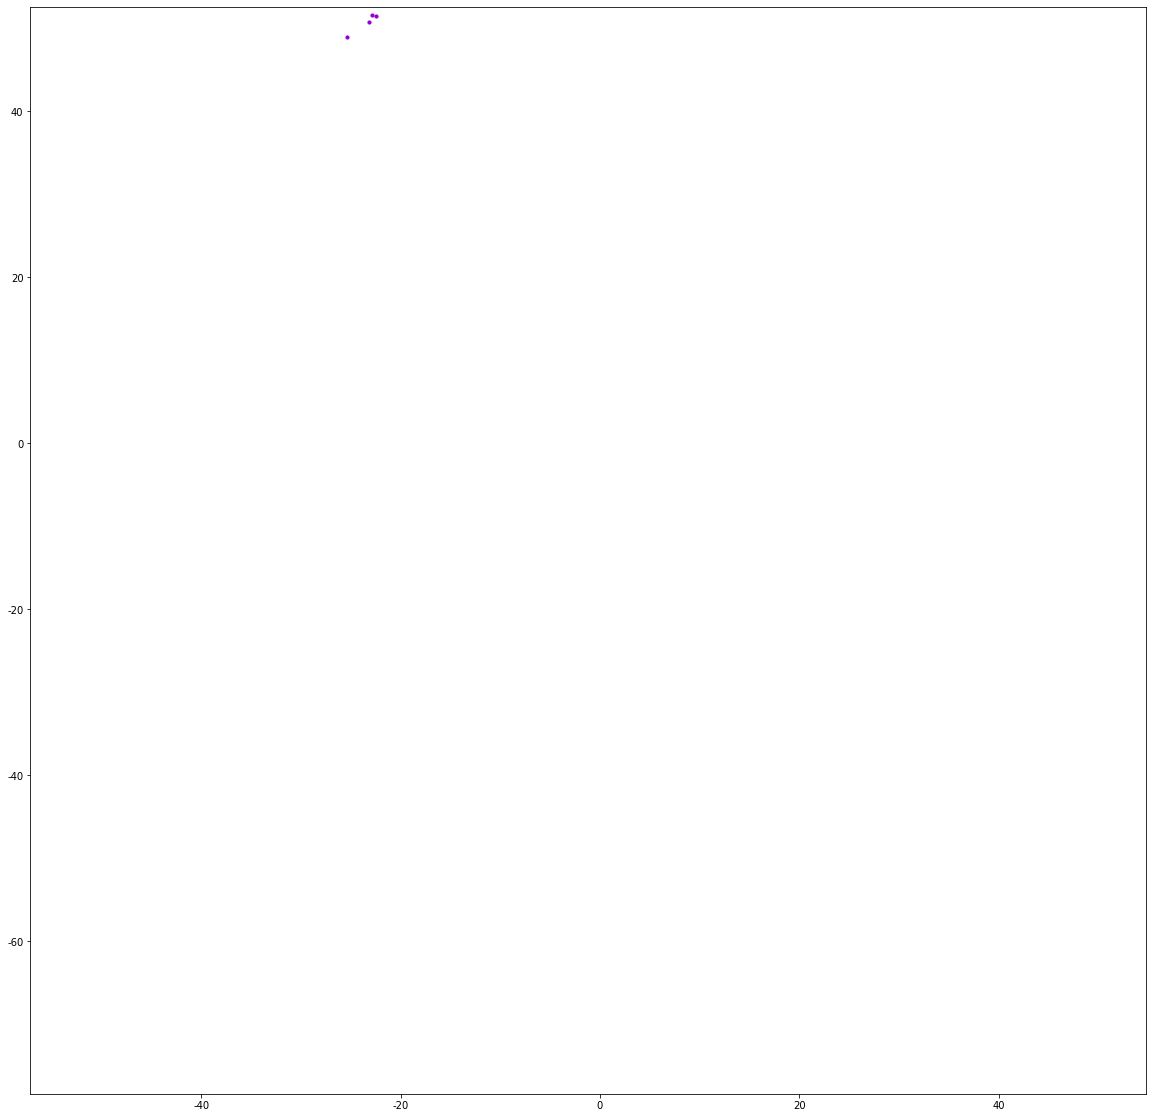

In [92]:
plt.figure(figsize=(20,20))
plt.xlim(data_tsne[:,0].min(), data_tsne[:,0].max()+1)
plt.ylim(data_tsne[:,1].min(), data_tsne[:,1].max()+1)
for i in range(len(data)):
    if topics_num[i] == 10:
        color = 'darkviolet'
    else:
        continue
        
    size = 10
    plt.scatter(data_tsne[i,0], data_tsne[i,1], c=color, s=size)
plt.show()

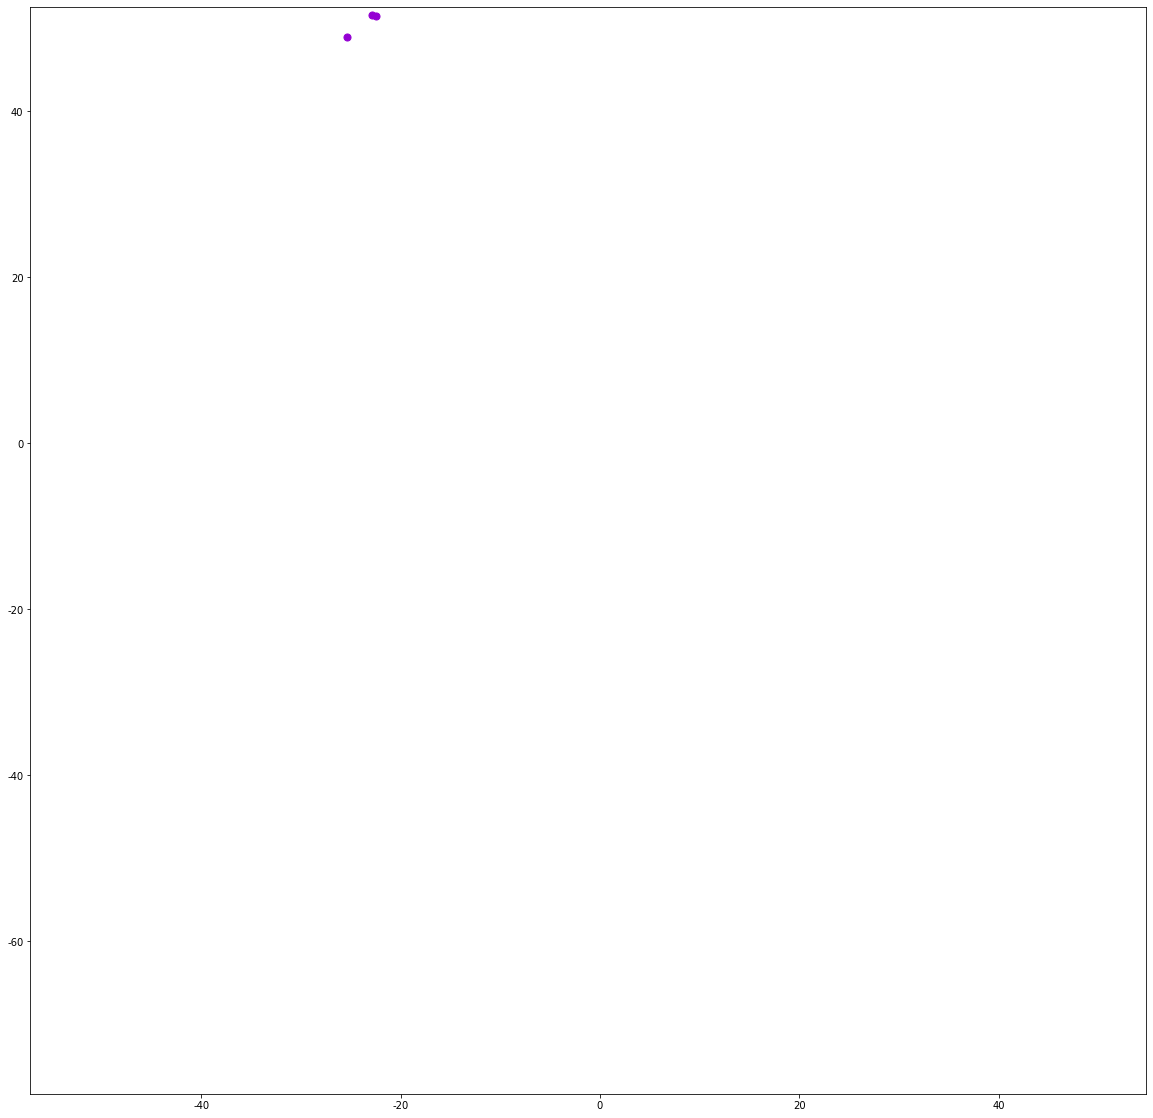

In [136]:
communities_10_1 = []
communities_10_2 = []

plt.figure(figsize=(20,20))
plt.xlim(data_tsne[:,0].min(), data_tsne[:,0].max()+1)
plt.ylim(data_tsne[:,1].min(), data_tsne[:,1].max()+1)

color = 'darkviolet'
size = 50

for i in range(len(data)):
    if topics_num[i] == 10:
        if data_tsne[i,0] > -24 and data_tsne[i,1] > 51:
            plt.scatter(data_tsne[i,0], data_tsne[i,1], c=color, s=size)
            communities_10_1.append(filenames_filtered[i])
        if data_tsne[i,0] <= -24:
            plt.scatter(data_tsne[i,0], data_tsne[i,1], c=color, s=size)
            communities_10_2.append(filenames_filtered[i])

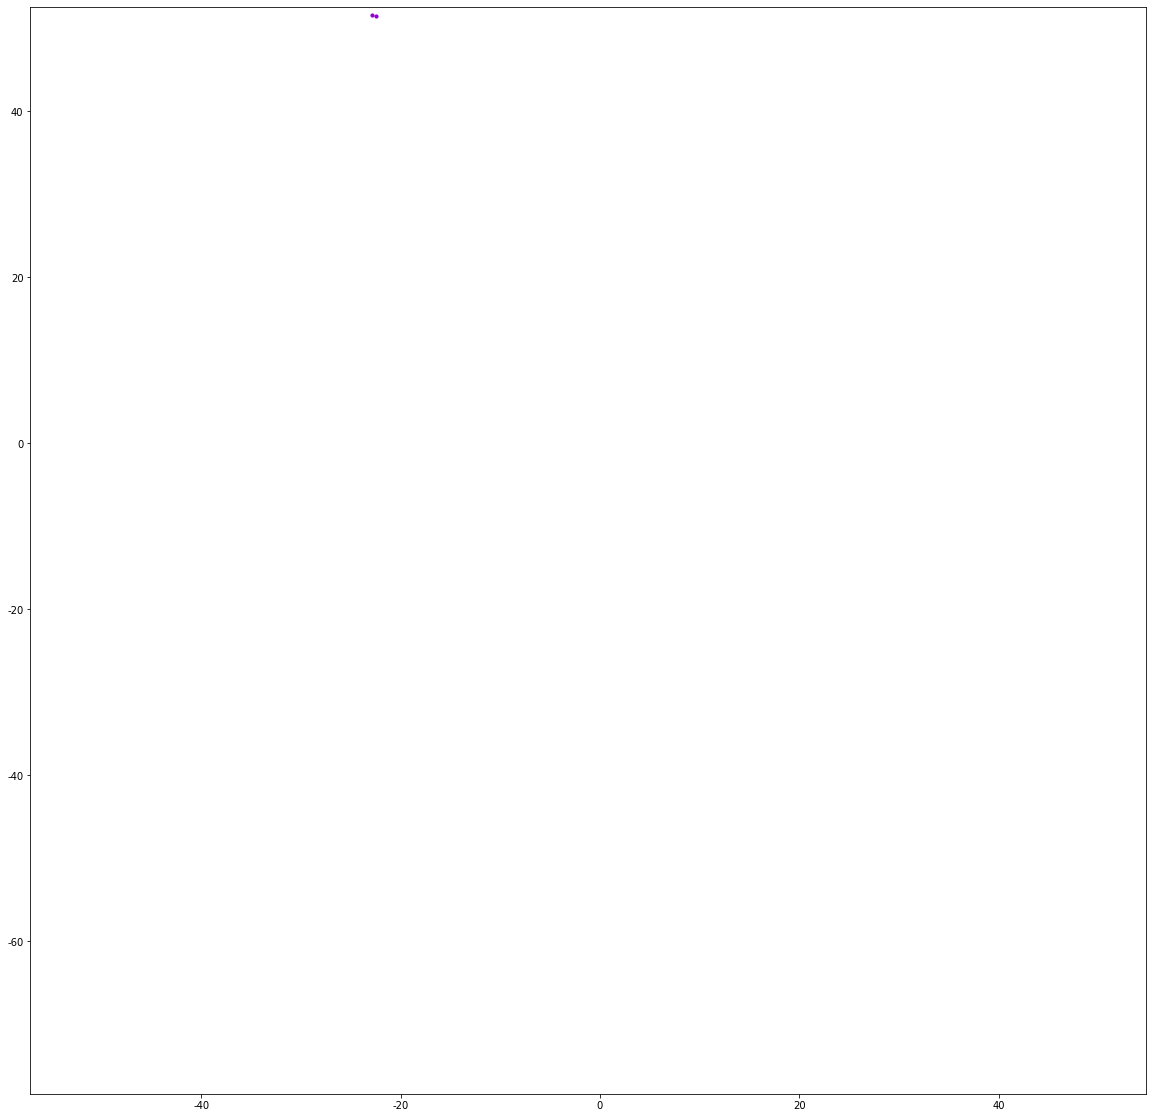

In [93]:
communities_10_1 = []

plt.figure(figsize=(20,20))
plt.xlim(data_tsne[:,0].min(), data_tsne[:,0].max()+1)
plt.ylim(data_tsne[:,1].min(), data_tsne[:,1].max()+1)

for i in range(len(data)):
    if topics_num[i] == 10:
        if data_tsne[i,0] > -24 and data_tsne[i,1] > 51:
            plt.scatter(data_tsne[i,0], data_tsne[i,1], c=color, s=size)
            communities_10_1.append(filenames_filtered[i])

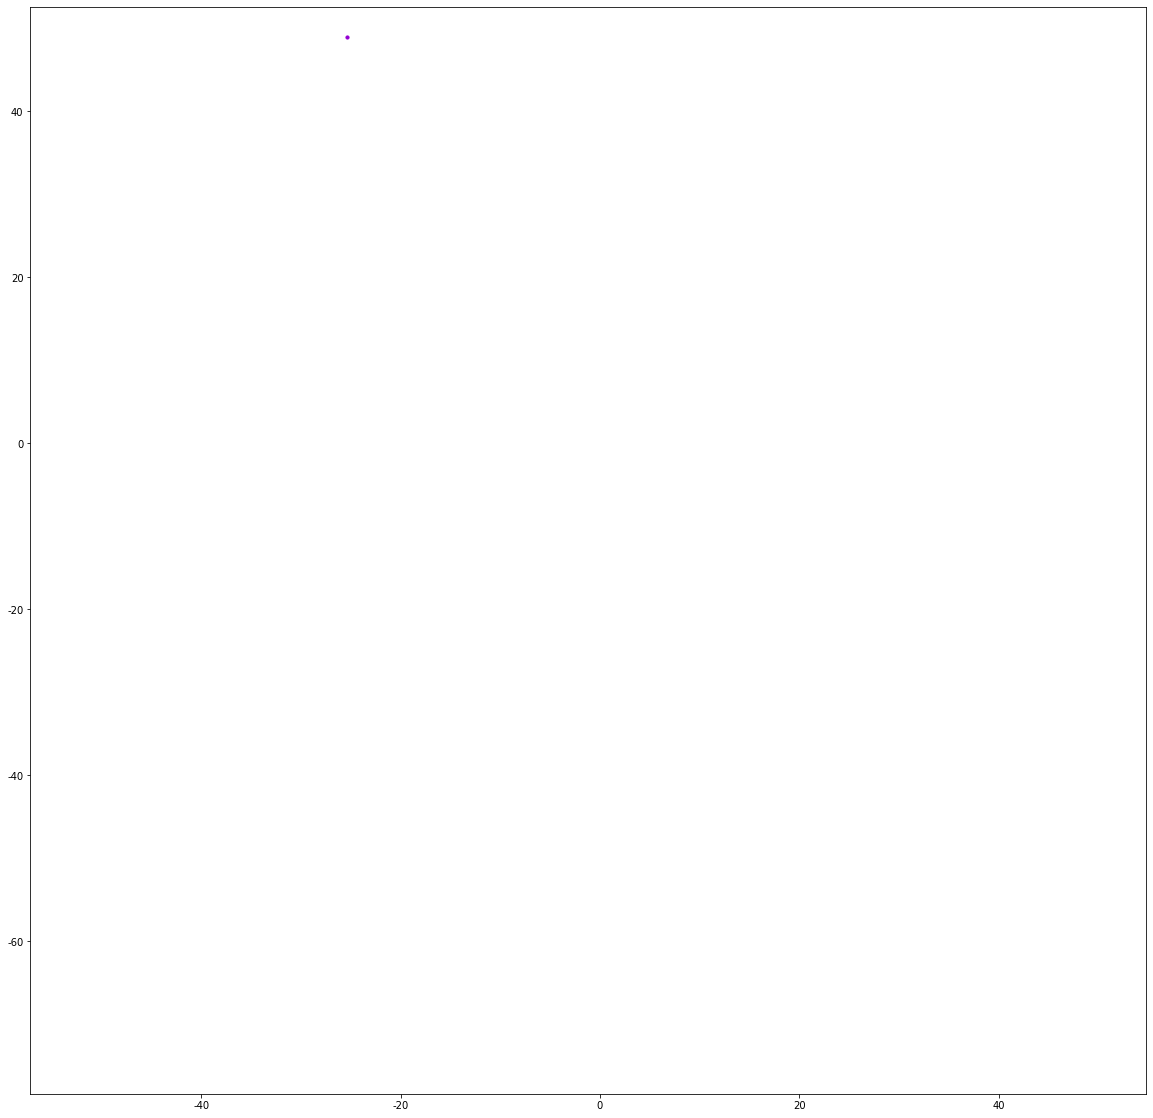

In [94]:
communities_10_2 = []

plt.figure(figsize=(20,20))
plt.xlim(data_tsne[:,0].min(), data_tsne[:,0].max()+1)
plt.ylim(data_tsne[:,1].min(), data_tsne[:,1].max()+1)

for i in range(len(data)):
    if topics_num[i] == 10:
        if data_tsne[i,0] <= -24:
            plt.scatter(data_tsne[i,0], data_tsne[i,1], c=color, s=size)
            communities_10_2.append(filenames_filtered[i])

In [134]:
idx = 1

for count in zip(word_count_and_tf_idf_similarity(communities_10_1), word_count_and_tf_idf_similarity(communities_10_2)):
    print(f'{idx}: {count}')
    print()
    idx += 1

1: (('day', 1.0), ('day', 1.0))

2: (('friend', 1.0), ('friend', 1.0))

3: (('need', 1.0), ('dae', 1.0))

4: (('today', 1.0), ('go', 1.0))

5: (('think', 1.0), ('need', 1.0))

6: (('life', 1.0), ('parent', 1.0))

7: (('time', 1.0), ('therapy', 1.0))

8: (('year', 1.0), ('today', 1.0))

9: (('one', 1.0), ('bipolar', 1.0))

10: (('anxious', 0.5), ('abuse', 1.0))

11: (('hate', 0.5), ('you', 1.0))

12: (('die', 0.5), ('think', 1.0))

13: (('attack', 0.5), ('life', 1.0))

14: (('depressed', 0.5), ('time', 1.0))

15: (('go', 0.5), ('trauma', 1.0))

16: (('never', 0.5), ('bpd', 1.0))

17: (('mental', 0.5), ('year', 1.0))

18: (('alone', 0.5), ('feeling', 1.0))

19: (('lonely', 0.5), ('one', 1.0))

20: (('love', 0.5), ('therapist', 1.0))



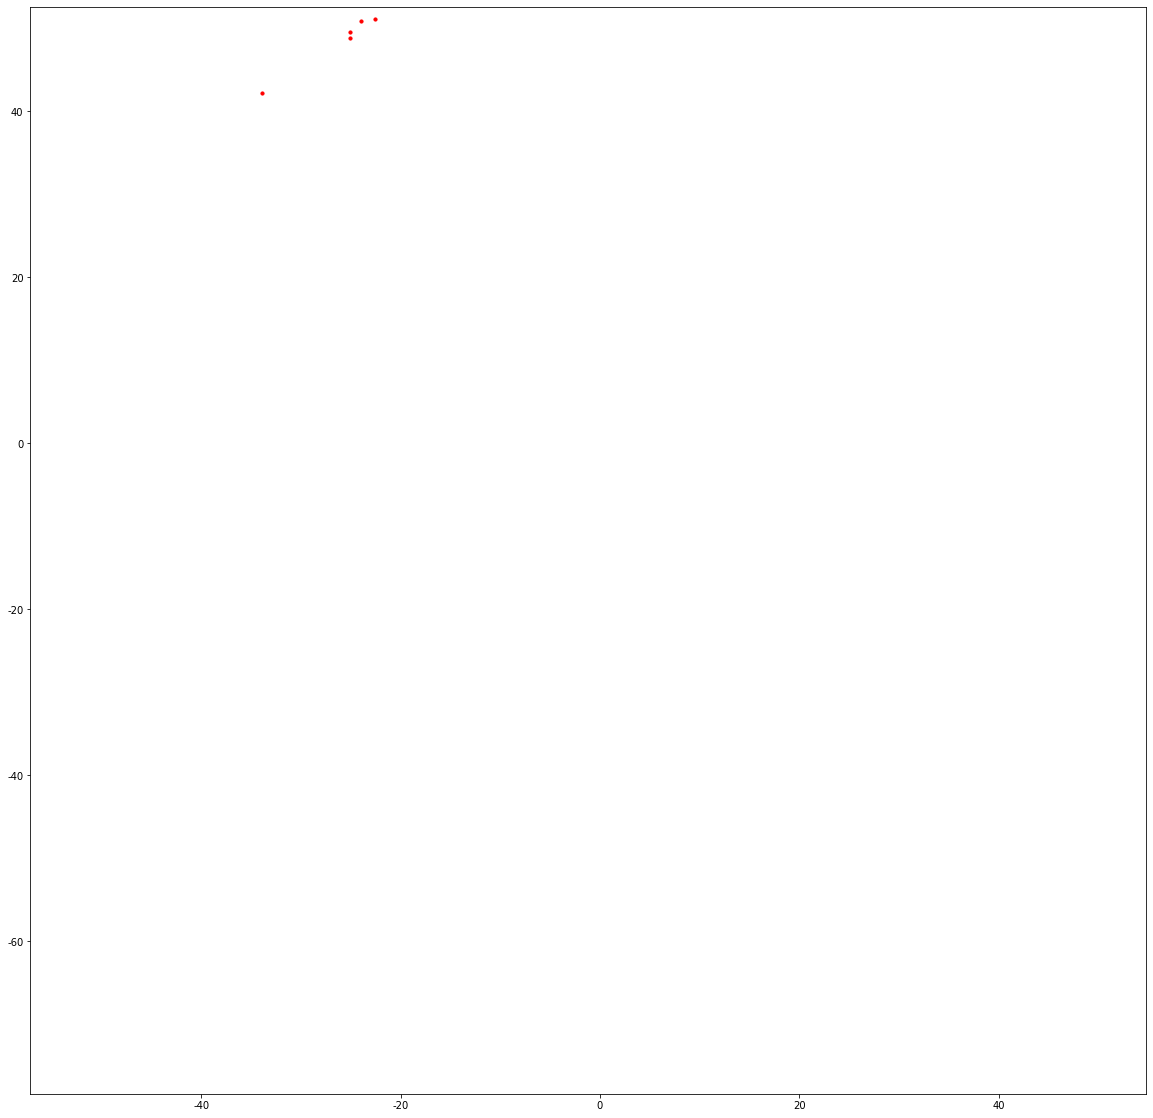

In [96]:
plt.figure(figsize=(20,20))
plt.xlim(data_tsne[:,0].min(), data_tsne[:,0].max()+1)
plt.ylim(data_tsne[:,1].min(), data_tsne[:,1].max()+1)
for i in range(len(data)):
    if topics_num[i] == 5:
        color = 'r'
    else:
        continue
        
    size = 10
    plt.scatter(data_tsne[i,0], data_tsne[i,1], c=color, s=size)
plt.show()

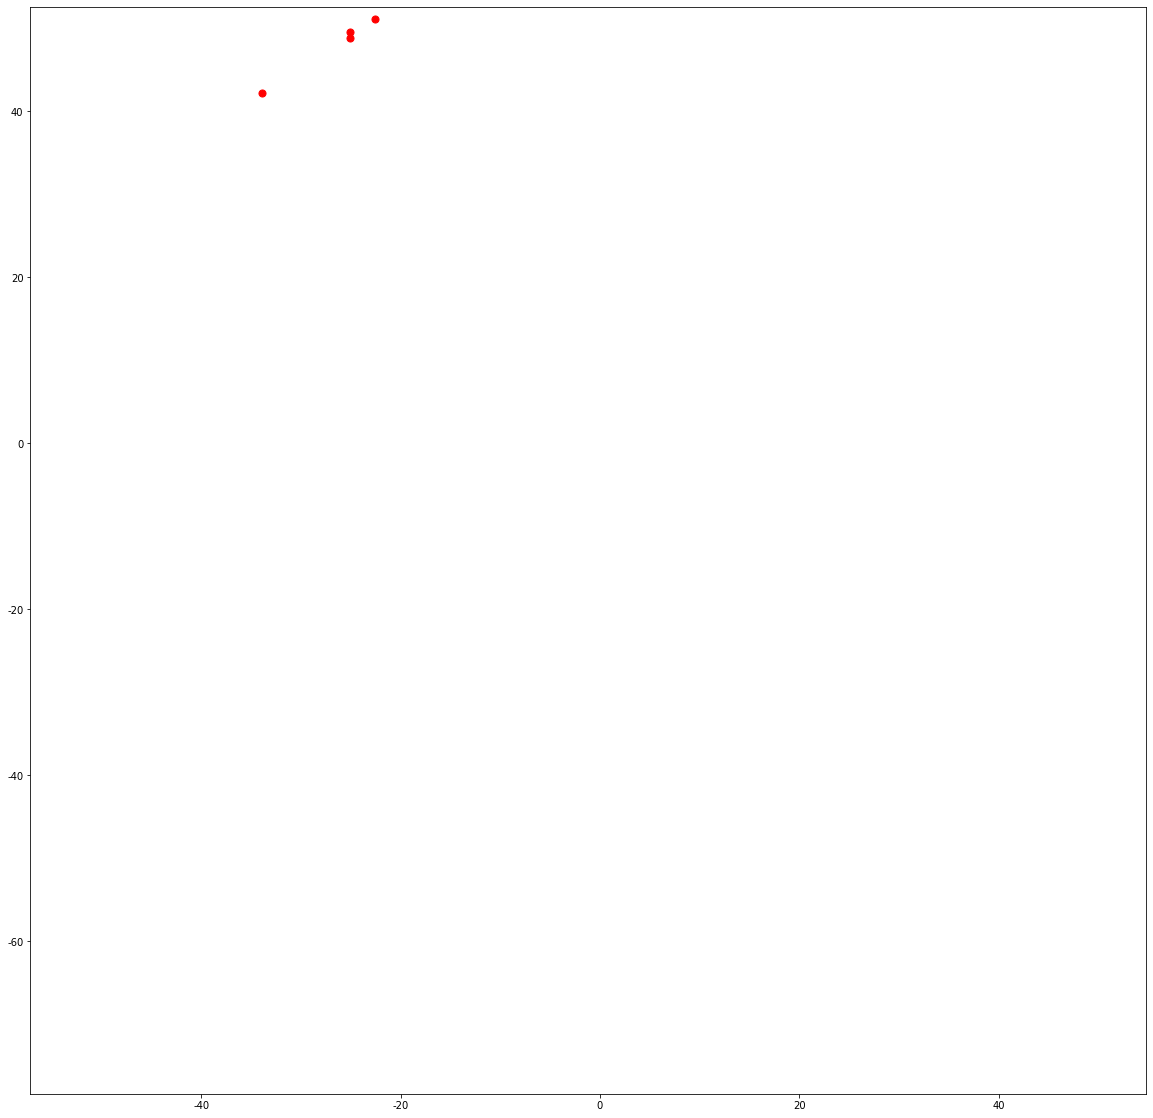

In [137]:
communities_5_1 = []
communities_5_2 = []
communities_5_3 = []

plt.figure(figsize=(20,20))
plt.xlim(data_tsne[:,0].min(), data_tsne[:,0].max()+1)
plt.ylim(data_tsne[:,1].min(), data_tsne[:,1].max()+1)

color = 'r'

for i in range(len(data)):
    if topics_num[i] == 5:
        if data_tsne[i,0] > -23:
            plt.scatter(data_tsne[i,0], data_tsne[i,1], c=color, s=size)
            communities_5_1.append(filenames_filtered[i])
        if data_tsne[i,0] < -30:
            plt.scatter(data_tsne[i,0], data_tsne[i,1], c=color, s=size)
            communities_5_2.append(filenames_filtered[i])
        if data_tsne[i,0] > -30 and data_tsne[i,0] < -24:
            plt.scatter(data_tsne[i,0], data_tsne[i,1], c=color, s=size)
            communities_5_3.append(filenames_filtered[i])

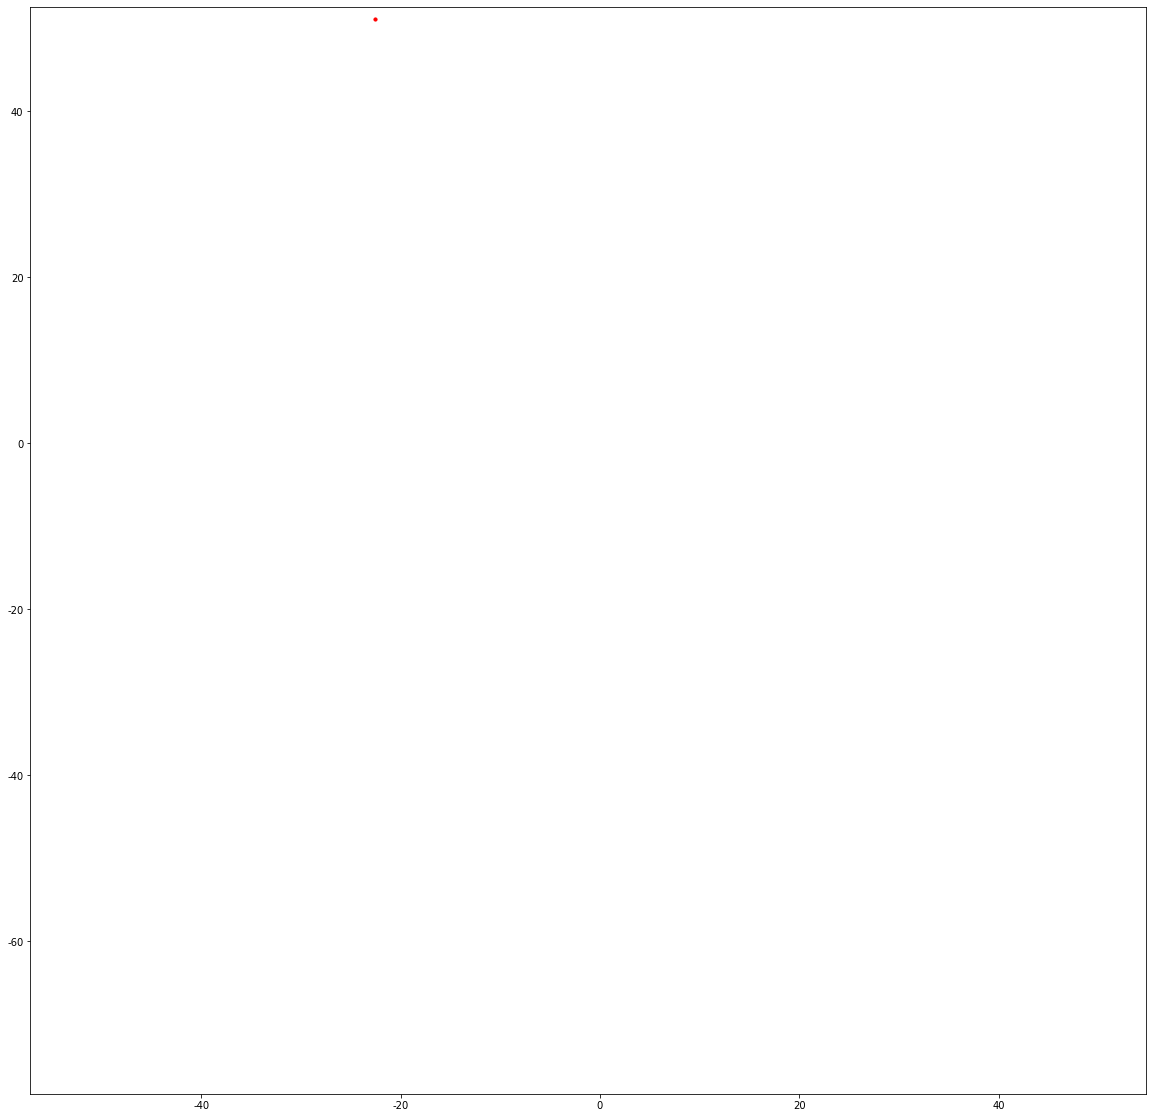

In [99]:
communities_5_1 = []

plt.figure(figsize=(20,20))
plt.xlim(data_tsne[:,0].min(), data_tsne[:,0].max()+1)
plt.ylim(data_tsne[:,1].min(), data_tsne[:,1].max()+1)

color = 'r'

for i in range(len(data)):
    if topics_num[i] == 5:
        if data_tsne[i,0] > -23:
            plt.scatter(data_tsne[i,0], data_tsne[i,1], c=color, s=size)
            communities_5_1.append(filenames_filtered[i])

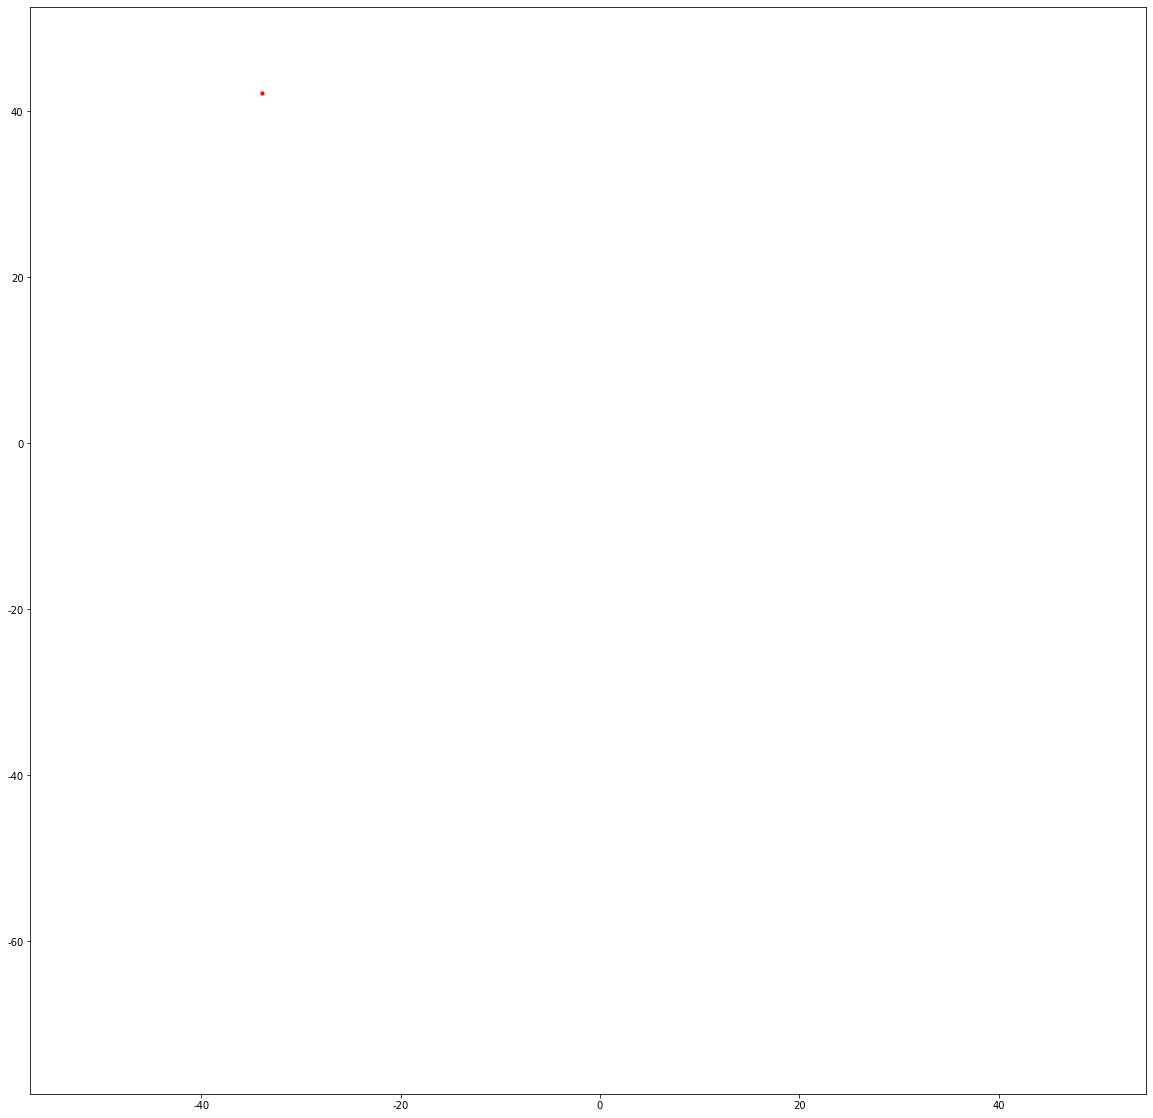

In [100]:
communities_5_2 = []

plt.figure(figsize=(20,20))
plt.xlim(data_tsne[:,0].min(), data_tsne[:,0].max()+1)
plt.ylim(data_tsne[:,1].min(), data_tsne[:,1].max()+1)

color = 'r'

for i in range(len(data)):
    if topics_num[i] == 5:
        if data_tsne[i,0] < -30:
            plt.scatter(data_tsne[i,0], data_tsne[i,1], c=color, s=size)
            communities_5_2.append(filenames_filtered[i])

In [101]:
idx = 1

for count in zip(word_count_and_tf_idf_similarity(communities_5_1), word_count_and_tf_idf_similarity(communities_5_2)):
    print(f'{idx}: {count}')
    print()
    idx += 1

1: (('even', 1.0), ('getting', 1.0))

2: (('day', 1.0), ('rage', 1.0))

3: (('suicidal', 1.0), ('friend', 1.0))

4: (('friend', 1.0), ('something', 1.0))

5: (('hate', 1.0), ('hate', 1.0))

6: (('die', 1.0), ('management', 1.0))

7: (('depressed', 1.0), ('advice', 1.0))

8: (('end', 1.0), ('need', 1.0))

9: (('go', 1.0), ('think', 1.0))

10: (('need', 1.0), ('life', 1.0))

11: (('suicide', 1.0), ('control', 1.0))

12: (('think', 1.0), ('anger', 1.0))

13: (('depression', 1.0), ('issue', 1.0))

14: (('life', 1.0), ('stop', 1.0))

15: (('time', 1.0), ('time', 1.0))

16: (('talk', 1.0), ('year', 1.0))

17: (('year', 1.0), ('mad', 1.0))

18: (('kill', 1.0), ('one', 1.0))

19: (('feeling', 1.0), ('person', 1.0))

20: (('one', 1.0), ('angry', 1.0))



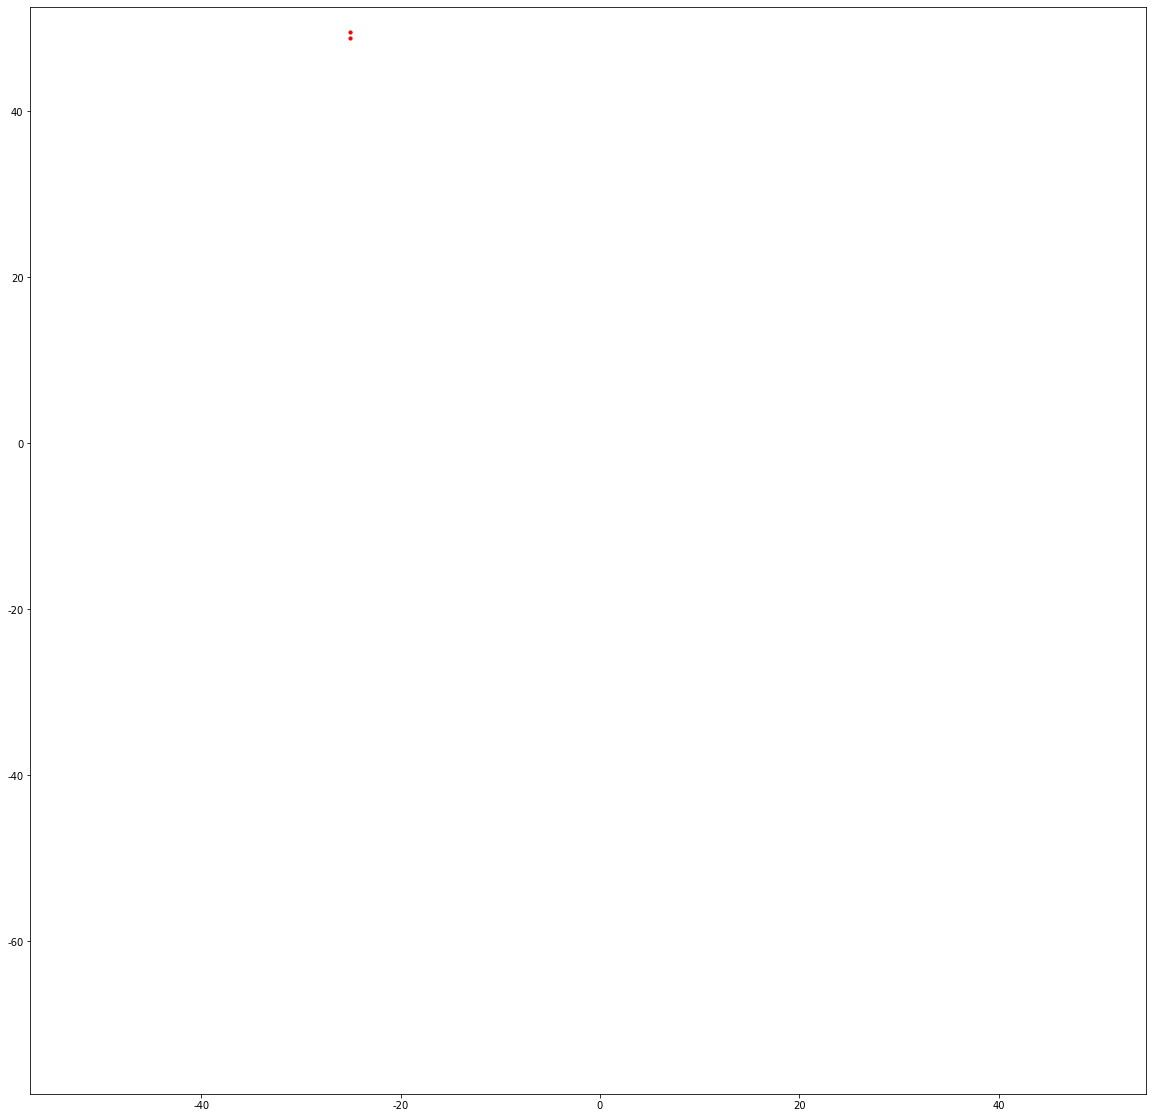

In [104]:
communities_5_3 = []

plt.figure(figsize=(20,20))
plt.xlim(data_tsne[:,0].min(), data_tsne[:,0].max()+1)
plt.ylim(data_tsne[:,1].min(), data_tsne[:,1].max()+1)

color = 'r'

for i in range(len(data)):
    if topics_num[i] == 5:
        if data_tsne[i,0] > -30 and data_tsne[i,0] < -24:
            plt.scatter(data_tsne[i,0], data_tsne[i,1], c=color, s=size)
            communities_5_3.append(filenames_filtered[i])

In [105]:
idx = 1

for count in zip(word_count_and_tf_idf_similarity(communities_5_3), word_count_and_tf_idf_similarity(communities_5_2)):
    print(f'{idx}: {count}')
    print()
    idx += 1

1: (('friend', 1.0), ('getting', 1.0))

2: (('need', 1.0), ('rage', 1.0))

3: (('think', 1.0), ('friend', 1.0))

4: (('depression', 1.0), ('something', 1.0))

5: (('life', 1.0), ('hate', 1.0))

6: (('year', 1.0), ('management', 1.0))

7: (('feeling', 1.0), ('advice', 1.0))

8: (('one', 1.0), ('need', 1.0))

9: (('month', 0.5), ('think', 1.0))

10: (('day', 0.5), ('life', 1.0))

11: (('getting', 0.5), ('control', 1.0))

12: (('die', 0.5), ('anger', 1.0))

13: (('depressed', 0.5), ('issue', 1.0))

14: (('week', 0.5), ('stop', 1.0))

15: (('bullied', 0.5), ('time', 1.0))

16: (('advice', 0.5), ('year', 1.0))

17: (('never', 0.5), ('mad', 1.0))

18: (('ive', 0.5), ('one', 1.0))

19: (('today', 0.5), ('person', 1.0))

20: (('relapsed', 0.5), ('angry', 1.0))



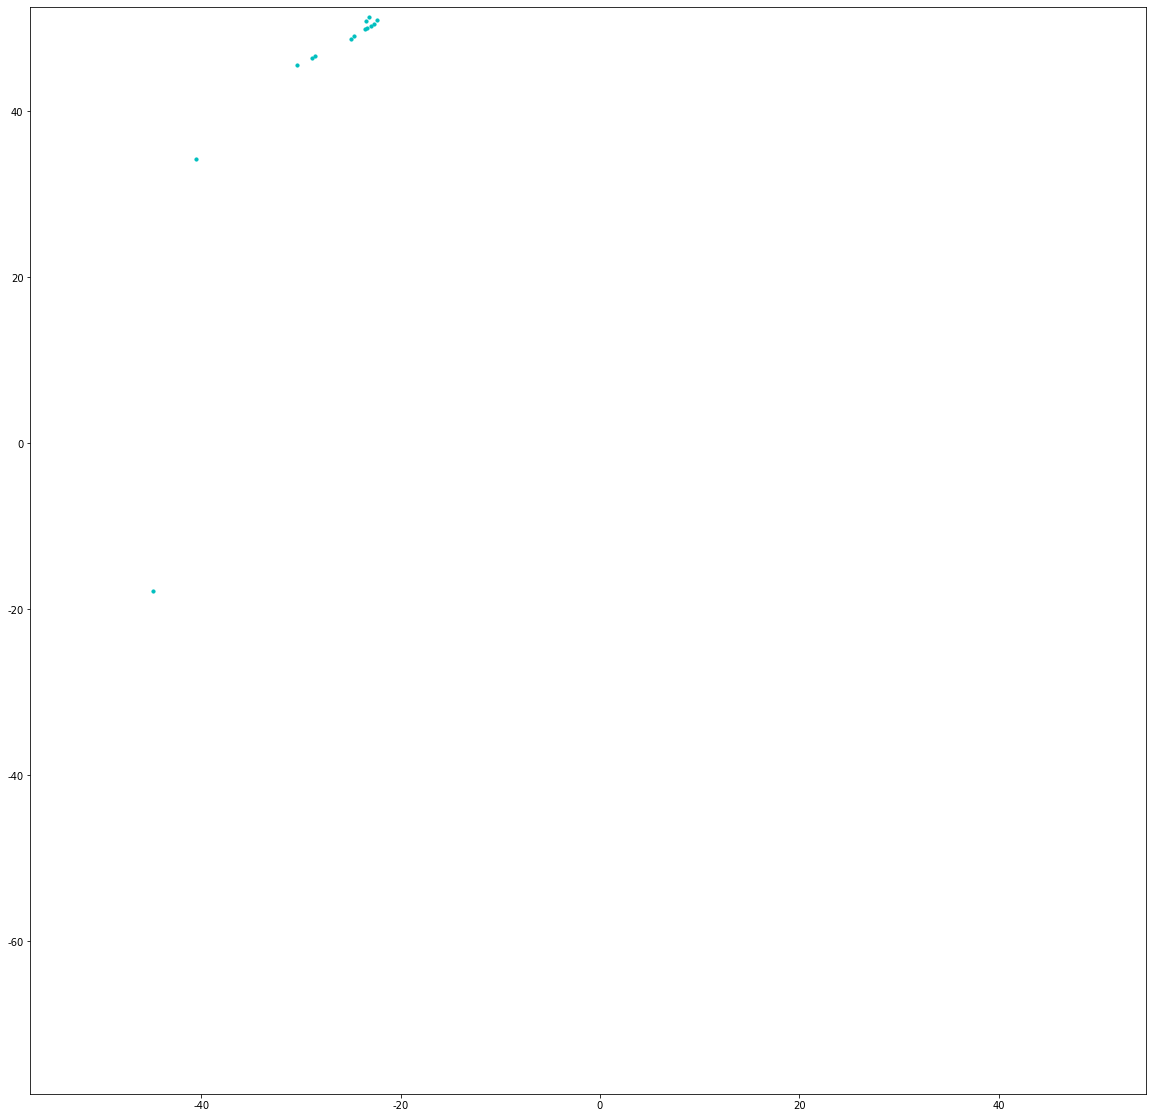

In [53]:
plt.figure(figsize=(20,20))
plt.xlim(data_tsne[:,0].min(), data_tsne[:,0].max()+1)
plt.ylim(data_tsne[:,1].min(), data_tsne[:,1].max()+1)
for i in range(len(data)):
    if topics_num[i] == 4:
        color = 'c'
    else:
        continue
        
    size = 10
    plt.scatter(data_tsne[i,0], data_tsne[i,1], c=color, s=size)
plt.show()

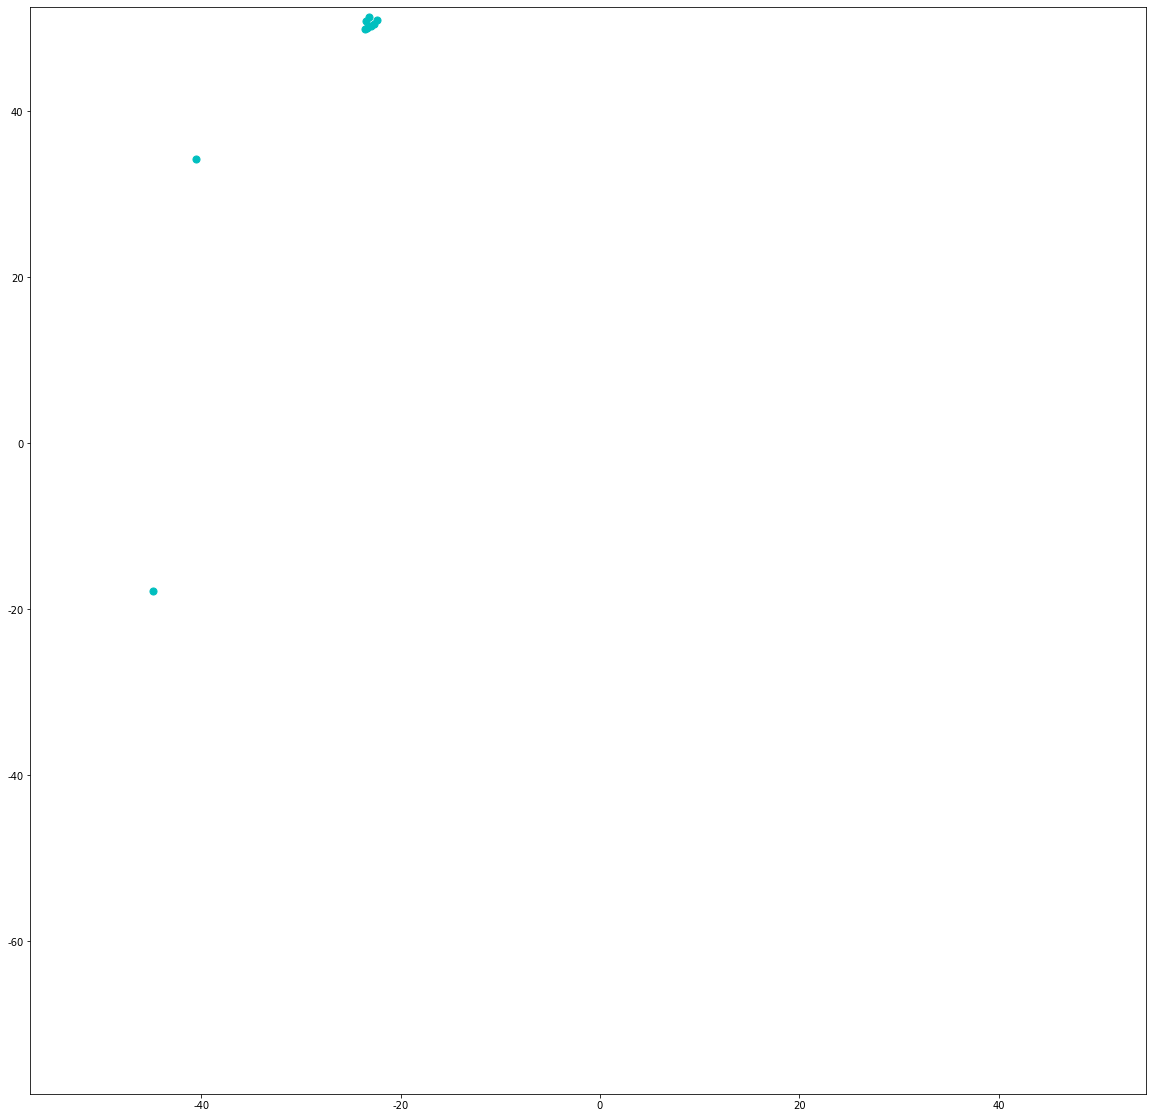

In [138]:
communities_4_1 = []
communities_4_2 = []
communities_4_3 = []

plt.figure(figsize=(20,20))
plt.xlim(data_tsne[:,0].min(), data_tsne[:,0].max()+1)
plt.ylim(data_tsne[:,1].min(), data_tsne[:,1].max()+1)

color = 'c'

for i in range(len(data)):
    if topics_num[i] == 4:
        if data_tsne[i,0] > -24:
            plt.scatter(data_tsne[i,0], data_tsne[i,1], c=color, s=size)
            communities_4_1.append(filenames_filtered[i])
        if data_tsne[i,0] < -42:
            plt.scatter(data_tsne[i,0], data_tsne[i,1], c=color, s=size)
            communities_4_2.append(filenames_filtered[i])
        if data_tsne[i,0] > -42 and data_tsne[i,0] < -35:
            plt.scatter(data_tsne[i,0], data_tsne[i,1], c=color, s=size)
            communities_4_3.append(filenames_filtered[i])

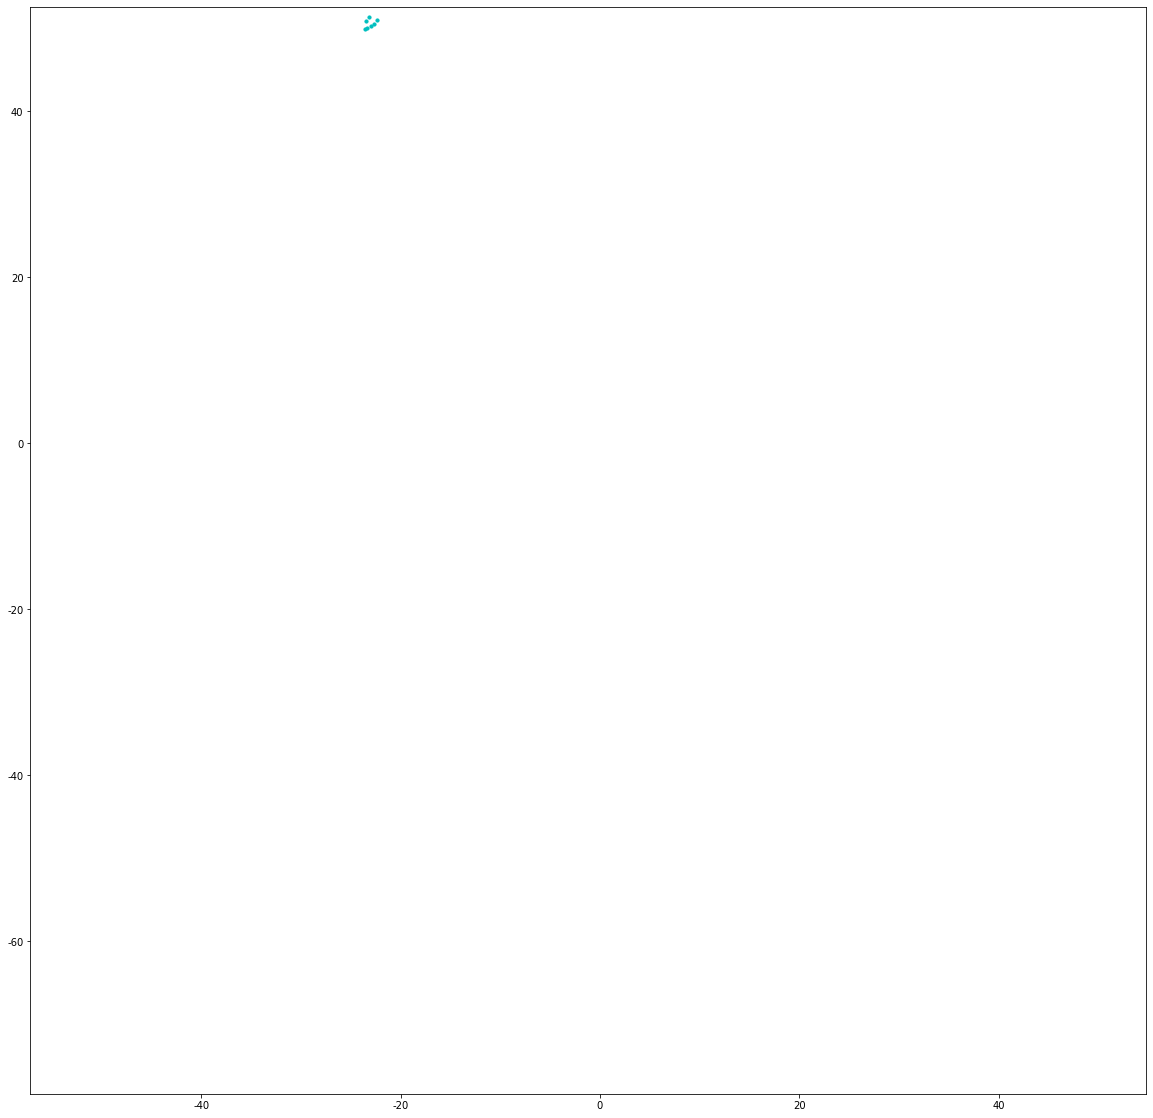

In [61]:
communities_4_1 = []

plt.figure(figsize=(20,20))
plt.xlim(data_tsne[:,0].min(), data_tsne[:,0].max()+1)
plt.ylim(data_tsne[:,1].min(), data_tsne[:,1].max()+1)

color = 'c'

for i in range(len(data)):
    if topics_num[i] == 4:
        if data_tsne[i,0] > -24:
            plt.scatter(data_tsne[i,0], data_tsne[i,1], c=color, s=size)
            communities_4_1.append(filenames_filtered[i])

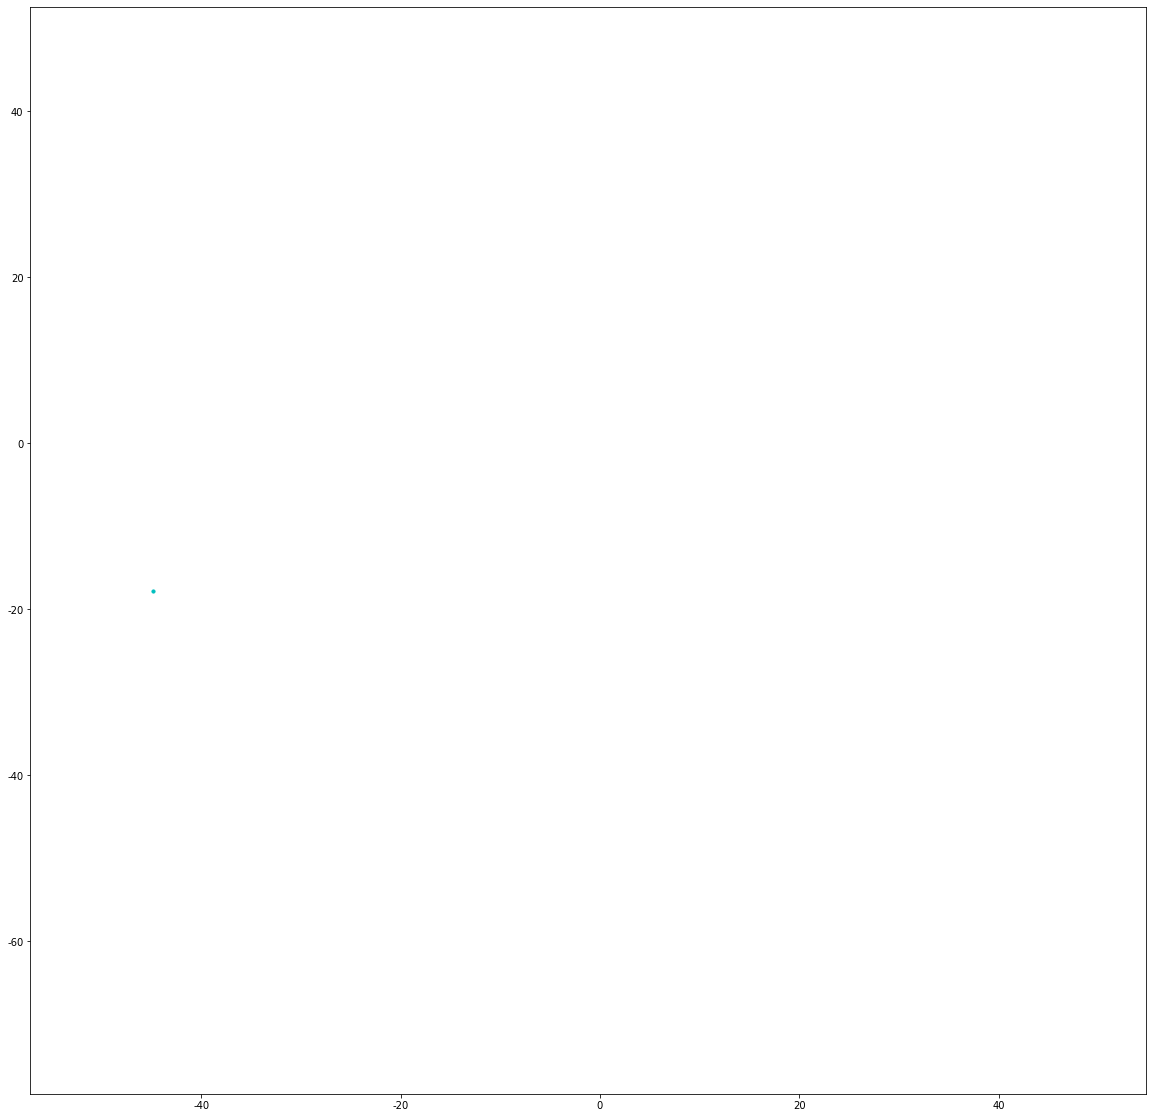

In [63]:
communities_4_2 = []

plt.figure(figsize=(20,20))
plt.xlim(data_tsne[:,0].min(), data_tsne[:,0].max()+1)
plt.ylim(data_tsne[:,1].min(), data_tsne[:,1].max()+1)

color = 'c'

for i in range(len(data)):
    if topics_num[i] == 4:
        if data_tsne[i,0] < -42:
            plt.scatter(data_tsne[i,0], data_tsne[i,1], c=color, s=size)
            communities_4_2.append(filenames_filtered[i])

In [139]:
idx = 1

for count in zip(word_count_and_tf_idf_similarity(communities_4_1), word_count_and_tf_idf_similarity(communities_4_2)):
    print(f'{idx}: {count}')
    print()
    idx += 1

1: (('need', 1.0), ('day', 1.0))

2: (('depression', 1.0), ('finally', 1.0))

3: (('life', 1.0), ('hair', 1.0))

4: (('depressed', 0.8571), ('end', 1.0))

5: (('friend', 0.7143), ('look', 1.0))

6: (('hate', 0.7143), ('eyebrow', 1.0))

7: (('die', 0.7143), ('started', 1.0))

8: (('today', 0.7143), ('left', 1.0))

9: (('think', 0.7143), ('bad', 1.0))

10: (('talk', 0.7143), ('stop', 1.0))

11: (('day', 0.5714), ('trich', 1.0))

12: (('tired', 0.4286), ('time', 1.0))

13: (('alone', 0.4286), ('year', 1.0))

14: (('better', 0.4286), ('pull', 1.0))

15: (('time', 0.4286), ('head', 1.0))

16: (('year', 0.4286), ('lash', 1.0))

17: (('feeling', 0.4286), ('eyelash', 1.0))

18: (('last', 0.2857), ('pulling', 1.0))

19: (('care', 0.2857), ('one', 1.0))

20: (('advice', 0.2857), ('new', 1.0))



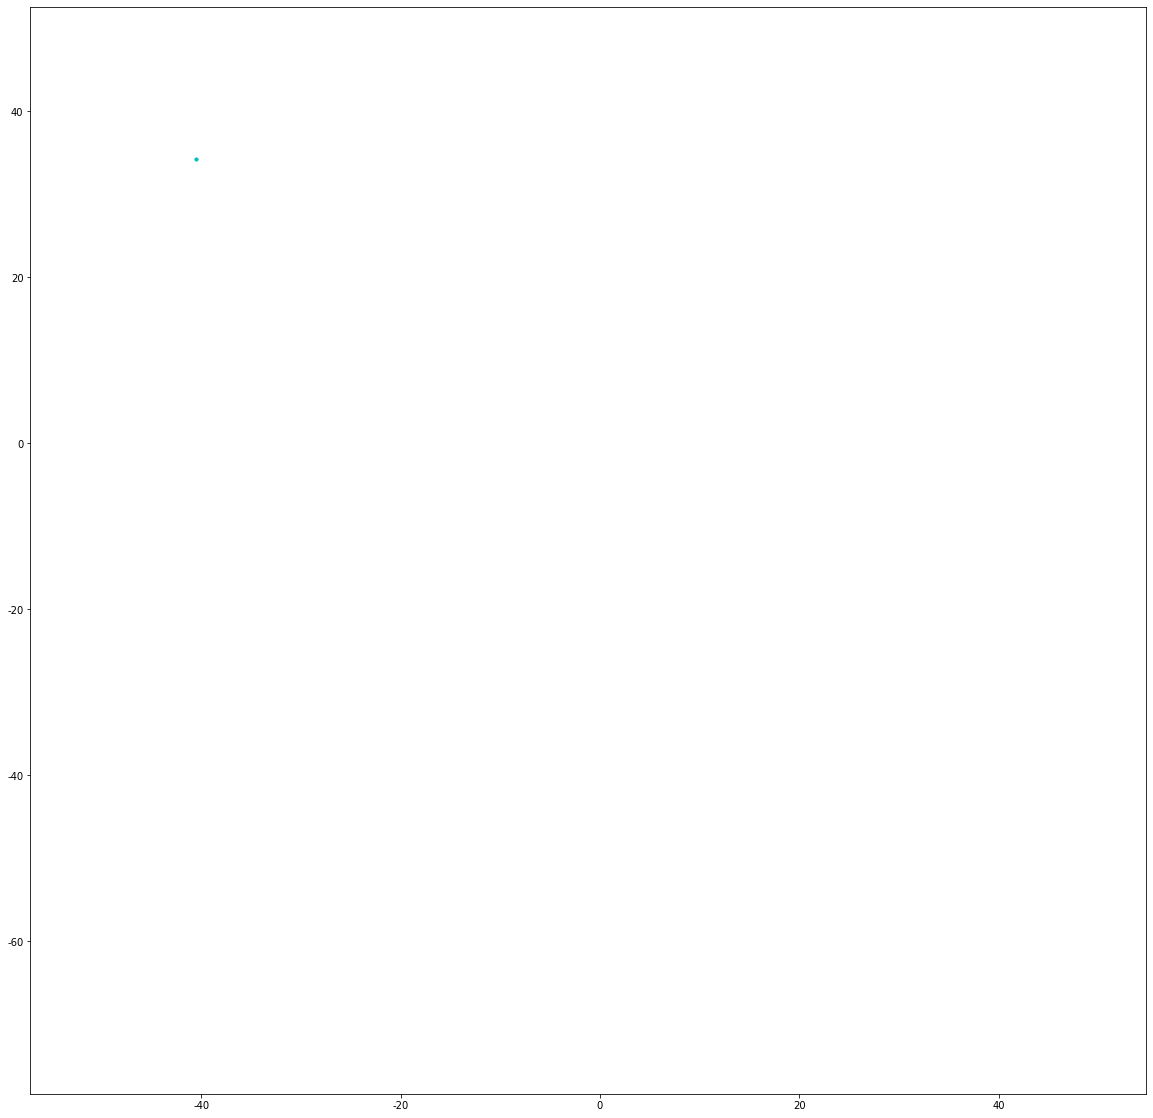

In [90]:
communities_4_3 = []

plt.figure(figsize=(20,20))
plt.xlim(data_tsne[:,0].min(), data_tsne[:,0].max()+1)
plt.ylim(data_tsne[:,1].min(), data_tsne[:,1].max()+1)

color = 'c'

for i in range(len(data)):
    if topics_num[i] == 4:
        if data_tsne[i,0] > -42 and data_tsne[i,0] < -35:
            plt.scatter(data_tsne[i,0], data_tsne[i,1], c=color, s=size)
            communities_4_3.append(filenames_filtered[i])

In [140]:
idx = 1

for count in zip(word_count_and_tf_idf_similarity(communities_4_1), word_count_and_tf_idf_similarity(communities_4_3)):
    print(f'{idx}: {count}')
    print()
    idx += 1

1: (('need', 1.0), ('told', 1.0))

2: (('depression', 1.0), ('friend', 1.0))

3: (('life', 1.0), ('die', 1.0))

4: (('depressed', 0.8571), ('end', 1.0))

5: (('friend', 0.7143), ('king', 1.0))

6: (('hate', 0.7143), ('need', 1.0))

7: (('die', 0.7143), ('pain', 1.0))

8: (('today', 0.7143), ('suicide', 1.0))

9: (('think', 0.7143), ('think', 1.0))

10: (('talk', 0.7143), ('life', 1.0))

11: (('day', 0.5714), ('old', 1.0))

12: (('tired', 0.4286), ('year', 1.0))

13: (('alone', 0.4286), ('came', 1.0))

14: (('better', 0.4286), ('kill', 1.0))

15: (('time', 0.4286), ('might', 1.0))

16: (('year', 0.4286), ('break', 1.0))

17: (('feeling', 0.4286), ('alive', 1.0))

18: (('last', 0.2857), ('road', 1.0))

19: (('care', 0.2857), ('tonight', 1.0))

20: (('advice', 0.2857), ('embarrassed', 1.0))



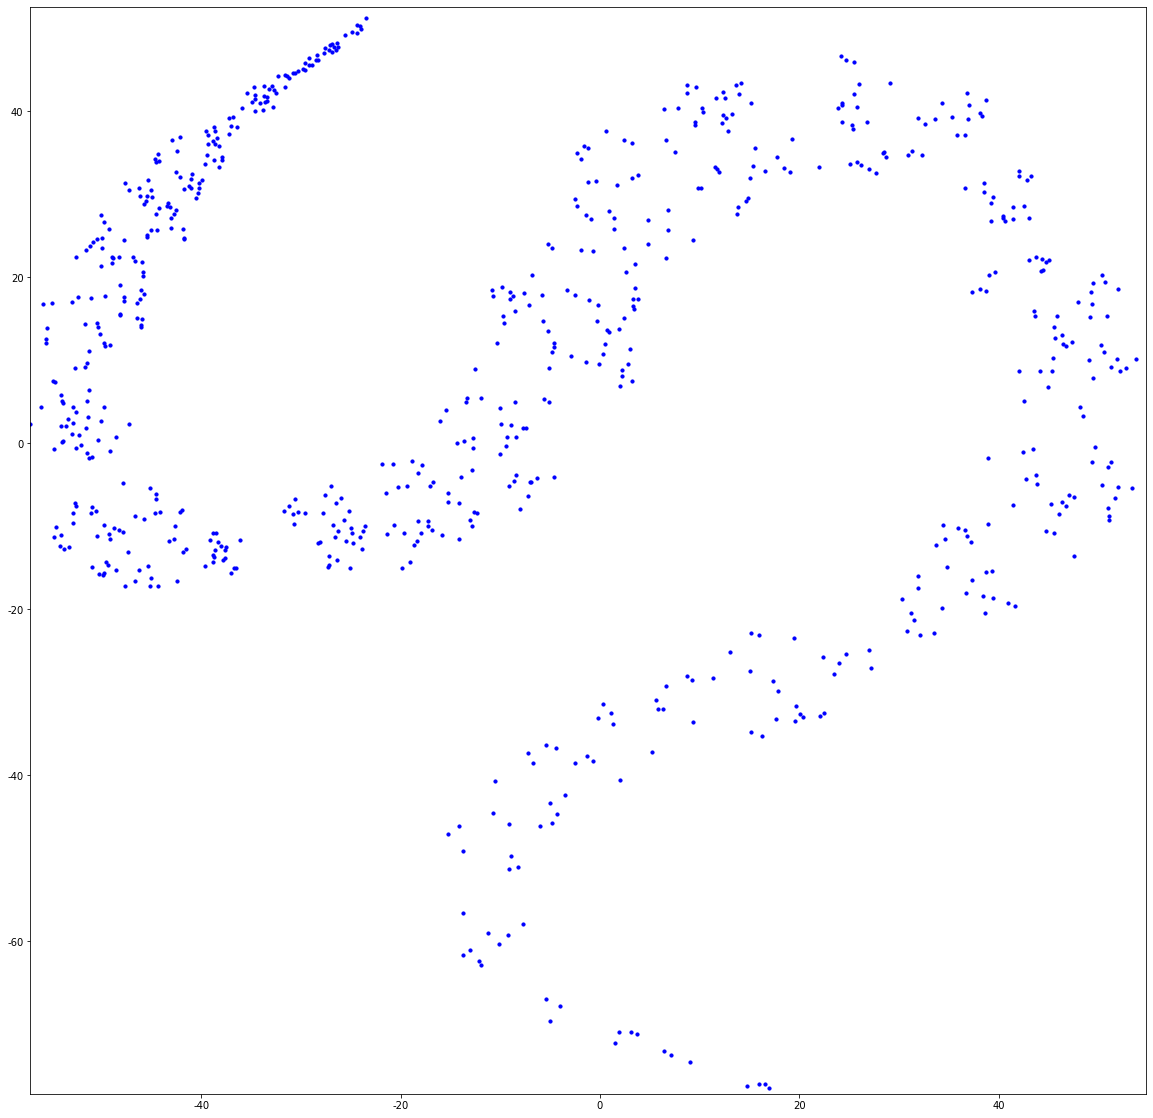

In [106]:
plt.figure(figsize=(20,20))
plt.xlim(data_tsne[:,0].min(), data_tsne[:,0].max()+1)
plt.ylim(data_tsne[:,1].min(), data_tsne[:,1].max()+1)
for i in range(len(data)):
    if topics_num[i] == 3:
        color = 'b'
    else:
        continue
        
    size = 10
    plt.scatter(data_tsne[i,0], data_tsne[i,1], c=color, s=size)
plt.show()

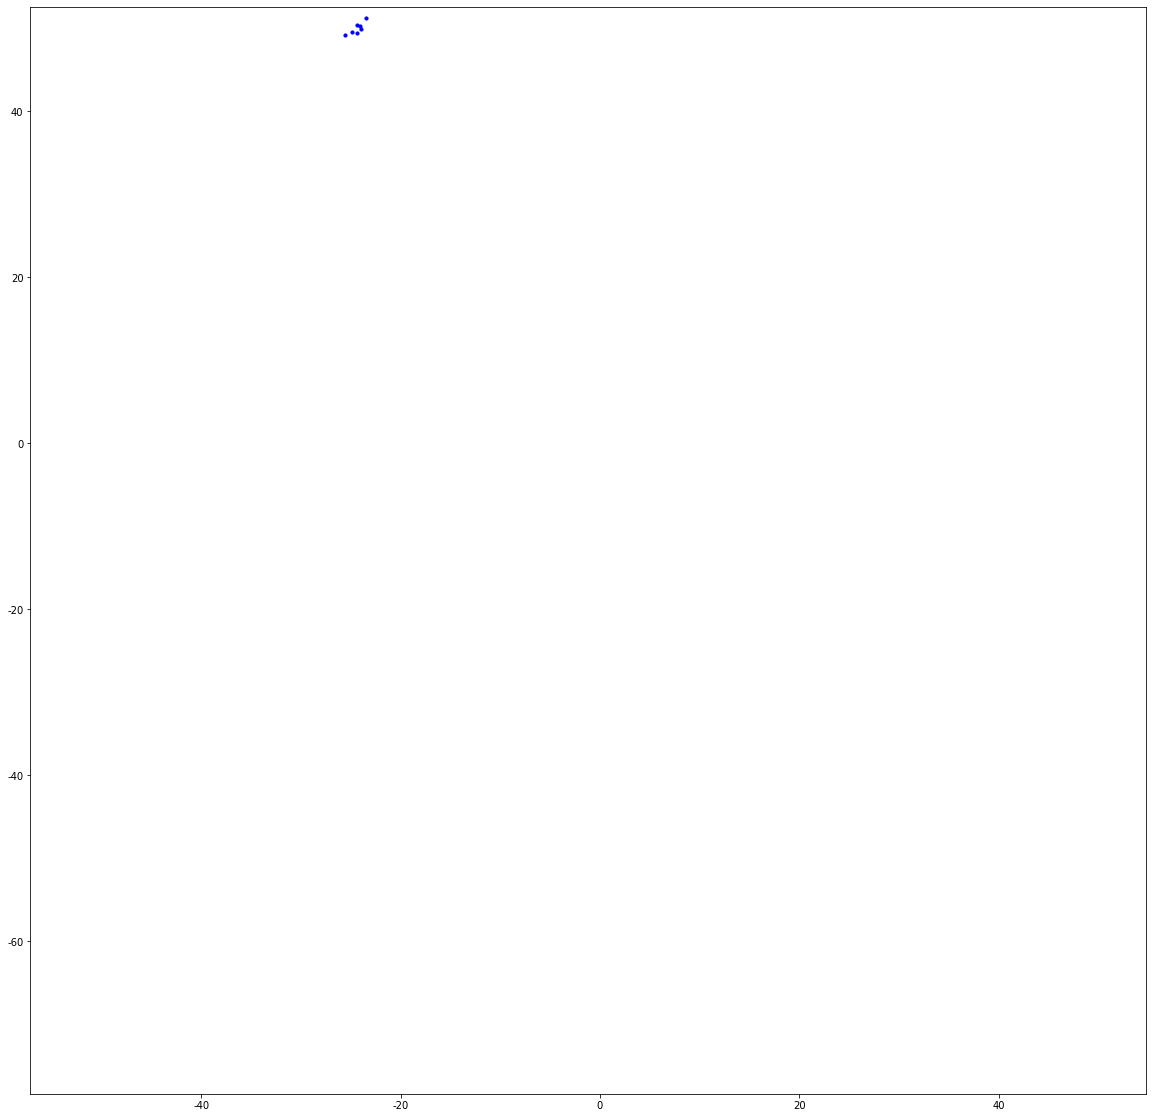

In [111]:
communities_3_1 = []

plt.figure(figsize=(20,20))
plt.xlim(data_tsne[:,0].min(), data_tsne[:,0].max()+1)
plt.ylim(data_tsne[:,1].min(), data_tsne[:,1].max()+1)

color = 'b'

for i in range(len(data)):
    if topics_num[i] == 3:
        if data_tsne[i,1] > 49:
            plt.scatter(data_tsne[i,0], data_tsne[i,1], c=color, s=size)
            communities_3_1.append(filenames_filtered[i])

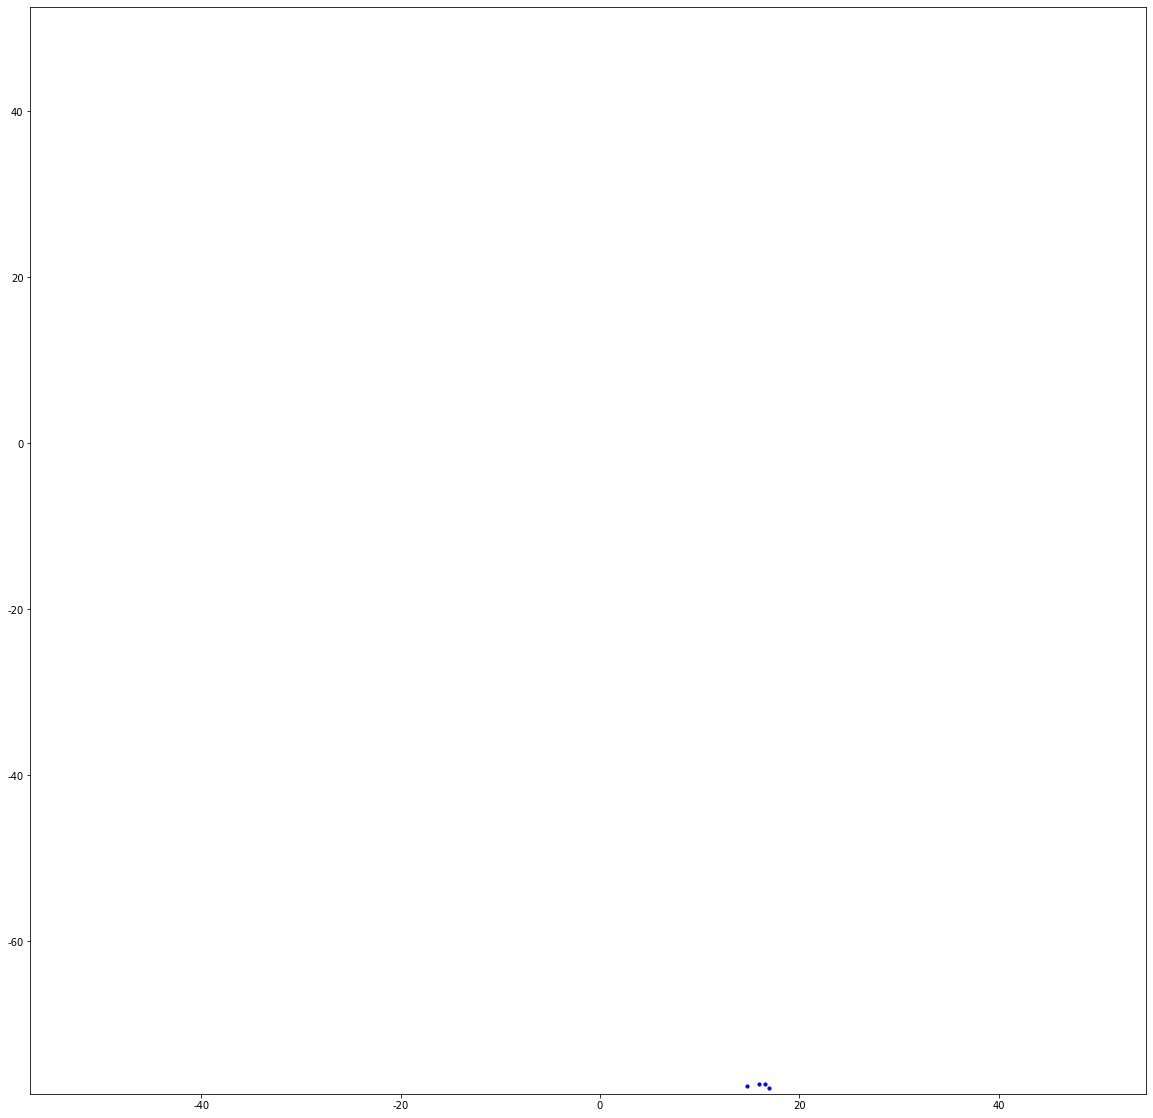

In [113]:
communities_3_2 = []

plt.figure(figsize=(20,20))
plt.xlim(data_tsne[:,0].min(), data_tsne[:,0].max()+1)
plt.ylim(data_tsne[:,1].min(), data_tsne[:,1].max()+1)

color = 'b'

for i in range(len(data)):
    if topics_num[i] == 3:
        if data_tsne[i,1] < -75:
            plt.scatter(data_tsne[i,0], data_tsne[i,1], c=color, s=size)
            communities_3_2.append(filenames_filtered[i])

In [114]:
idx = 1

for count in zip(word_count_and_tf_idf_similarity(communities_3_1), word_count_and_tf_idf_similarity(communities_3_2)):
    print(f'{idx}: {count}')
    print()
    idx += 1

1: (('life', 0.8571), ('accept', 0.25))

2: (('need', 0.7143), ('getting', 0.25))

3: (('hate', 0.7143), ('always', 0.25))

4: (('care', 0.5714), ('able', 0.25))

5: (('talk', 0.5714), ('nervous', 0.25))

6: (('die', 0.5714), ('surprised', 0.25))

7: (('kill', 0.5714), ('coronavirus', 0.25))

8: (('suicide', 0.4286), ('sure', 0.25))

9: (('day', 0.4286), ('color', 0.25))

10: (('alone', 0.4286), ('ruin', 0.25))

11: (('bad', 0.4286), ('buddy', 0.25))

12: (('time', 0.4286), ('once', 0.25))

13: (('year', 0.4286), ('soon', 0.25))

14: (('one', 0.4286), ('memory', 0.25))

15: (('depressed', 0.4286), ('setting', 0.25))

16: (('today', 0.4286), ('diagnosed', 0.25))

17: (('depression', 0.4286), ('paint', 0.25))

18: (('feeling', 0.4286), ('dog', 0.25))

19: (('end', 0.2857), ('deodorant', 0.25))

20: (('ive', 0.2857), ('could', 0.25))

21: (('person', 0.2857), ('addicted', 0.25))

22: (('friend', 0.2857), ('using', 0.25))

23: (('tired', 0.2857), ('ill', 0.25))

24: (('go', 0.2857), ('unem

In [ ]:
cluster = []

plt.figure(figsize=(20,20))
plt.xlim(data_tsne[:,0].min(), data_tsne[:,0].max()+1)
plt.ylim(data_tsne[:,1].min(), data_tsne[:,1].max()+1)

color = 'c'

for i in range(len(data)):
    if data_tsne[i,0] > 20 and data_tsne[i,1] > - 20:
        plt.scatter(data_tsne[i,0], data_tsne[i,1], c=color, s=size)
        cluster_11.append(filenames_filtered[i])
        
clusters.append(cluster_11)

In [17]:
all_tw = []
for filename in filenames_filtered:
    with open(f'../lda/csv/lda_results/nodes/posts/topic_words_stop_words_removed_same_topic_num_20_for_tsne/{filename}', newline='') as f:
        reader = csv.reader(f)
        topics = list(reader)
        topics = sum(topics, [])
        all_tw.append(topics)
        
all_tw = list(set(sum(all_tw, [])))
all_tw_rst = [all_tw]

print(all_tw_rst)

[['week', 'hose', 'nicely', 'future', 'anythin', 'platitude', 'spainðÿ˜\xad', 'ruin', 'shape', 'consumer', 'good', 'parenting', 'hydroxyzine', 'triggered', 'option', 'romantically', 'ð\x9d\x90¼', 'away', 'dreading', 'colored', 'bummer', 'debit', 'disrupting', 'streak', 'ourselves', 'psychology', 'to', 'pstd', 'exited', 'anxietyinducing', 'benadryl', 'reward', 'irrationally', 'per', 'donar', 'painlesseasy', 'enoughâ€\x9d', 'settled', 'dreamed', 'february', 'goal', 'pole', 'balancing', 'difficulty', 'mania', 'snoop', 'honest', 'domestic', 'boyfriendgirlfriend', 'overthinking', 'description', 'cheek', 'include', 'nowhere', 'dysphoria', 'my18', 'unavailable', 'soulution', 'communion', 'deactivate', 'machine', 'reparenting', 'ptsdrelated', 'offering', 'tipsadvice', 'bender', 'mexican', 'membership', 'suppose', 'shopping', 'insult', 'answer', 'road', 'widower', 'super', 'herpes', 'tv', 'brotherinlaw', 'harvard', '30th', 'iowa', 'obtain', 'alcoholic', 'store', 'ðÿ¤ÿ', 'amphetamine', 'old', 'c

In [18]:
mean_vector_list = []
topics_num = []

# print(all_tw)

model = Word2Vec(all_tw_rst, min_count=1)

for filename in filenames_filtered:
    with open(f'../lda/csv/lda_results/nodes/posts/topic_words_stop_words_removed_same_topic_num_20_for_tsne/{filename}', newline='') as f:
        reader = csv.reader(f)
        tws = list(reader)
        topics_num.append(len(tws))
        
        tws = sum(tws, [])
        # print(tws)
        
        word_vector_list = []
        mean_vector = []
        word_vectors = model.wv
        
        for tw in tws:
            word_vector_list.append(word_vectors[tw].tolist())
        
        for element in zip(*word_vector_list):
            mean_vector.append(float(np.mean(element)))
        
        mean_vector_list.append(mean_vector)

In [19]:
# convert list to np.array
mean_vector_array = np.array(mean_vector_list)
print(mean_vector_array)

[[-1.34902725e-04 -5.15703112e-04  1.00152896e-03 ...  4.99785718e-04
  -1.66184480e-03  1.05480016e-03]
 [ 6.66197752e-04 -1.30688529e-03  3.93239011e-04 ... -1.04416495e-03
   5.24478144e-04  1.24308813e-03]
 [ 4.47493176e-04  8.63455099e-04 -1.25178721e-03 ... -7.12095966e-04
  -1.81267189e-03 -1.59620859e-03]
 ...
 [ 7.89262487e-04  2.36355321e-03  1.81349458e-03 ...  8.29218881e-04
  -1.32740877e-04 -9.53458979e-04]
 [ 2.01977406e-03  8.22333870e-04  3.08583629e-04 ... -1.56298170e-03
  -2.07408552e-04 -1.43107885e-04]
 [-6.62471962e-04  3.62349177e-05  6.35649391e-04 ... -1.01437909e-05
  -8.11607108e-04 -4.96238688e-05]]


In [20]:
from sklearn.manifold import TSNE

data = mean_vector_array
print(type(data))
print(data)
# n_components = 2

# model = TSNE(n_components=n_components)
# print(model.fit_transform(data))

plt.rc('axes', unicode_minus=False)
tsne = TSNE(random_state = 42)
data_tsne = tsne.fit_transform(data)
print(data_tsne)

<class 'numpy.ndarray'>
[[-1.34902725e-04 -5.15703112e-04  1.00152896e-03 ...  4.99785718e-04
  -1.66184480e-03  1.05480016e-03]
 [ 6.66197752e-04 -1.30688529e-03  3.93239011e-04 ... -1.04416495e-03
   5.24478144e-04  1.24308813e-03]
 [ 4.47493176e-04  8.63455099e-04 -1.25178721e-03 ... -7.12095966e-04
  -1.81267189e-03 -1.59620859e-03]
 ...
 [ 7.89262487e-04  2.36355321e-03  1.81349458e-03 ...  8.29218881e-04
  -1.32740877e-04 -9.53458979e-04]
 [ 2.01977406e-03  8.22333870e-04  3.08583629e-04 ... -1.56298170e-03
  -2.07408552e-04 -1.43107885e-04]
 [-6.62471962e-04  3.62349177e-05  6.35649391e-04 ... -1.01437909e-05
  -8.11607108e-04 -4.96238688e-05]]
[[ -4.889784  -23.466026 ]
 [-11.98655    -3.0577247]
 [ -6.7591596   8.809744 ]
 ...
 [  7.4552736  -7.281958 ]
 [ -9.2585     -3.707017 ]
 [ 10.349949   -3.3747575]]


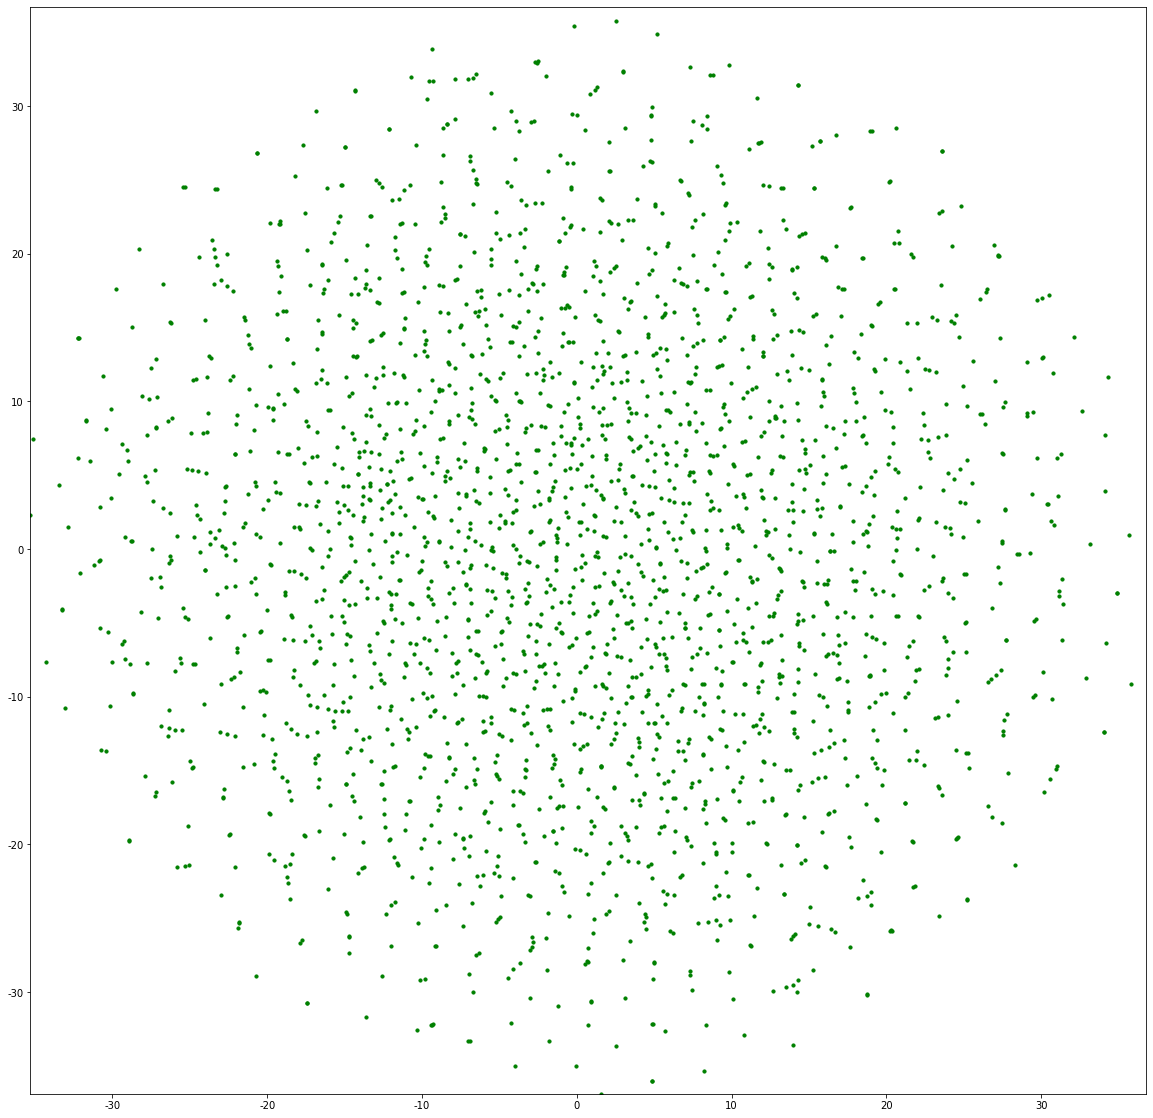

In [21]:
plt.figure(figsize=(20,20))
plt.xlim(data_tsne[:,0].min(), data_tsne[:,0].max()+1)
plt.ylim(data_tsne[:,1].min(), data_tsne[:,1].max()+1)
for i in range(len(data)):
    if topics_num[i] == 10:
        color = 'darkviolet'
    elif topics_num[i] == 5:
        color = 'r'
    elif topics_num[i] == 4:
        color = 'c'
    elif topics_num[i] == 3:
        color = 'b'
    else:
        color = 'g'
        
    size = 10
    plt.scatter(data_tsne[i,0], data_tsne[i,1], c=color, s=size)
plt.show()

## global all topic words list

In [370]:
def find_csv_filenames(path_to_dir, suffix=".csv" ):
    filenames = listdir(path_to_dir)
    return [ filename for filename in filenames if filename.endswith( suffix ) ]

filenames = find_csv_filenames("../lda/csv/lda_results/nodes/posts/topic_words_stop_words_removed_10_for_tsne")

all_topic_words = []

for i in range(len(filenames)):
    with open(f'../lda/csv/lda_results/nodes/posts/topic_words_stop_words_removed_10_for_tsne/{filenames[i]}', newline='') as f:
        reader = csv.reader(f)
        topics = list(reader)
        topics = sum(topics, [])
        s_tw = set(topics)
        all_topic_words.append(topics)
        
all_topic_words_from_all_files = sum(all_topic_words, [])
print(len(all_topic_words_from_all_files))

82795


In [68]:
def word_count_and_tf_idf_similarity(filenames, print_word_count=False, average=True):
    all_topic_words = []
    len_files = len(filenames)
    
    
    # print(f'topic_num: {topic_num}')
    # print('')
    
    for i in range(len(filenames)):
        with open(f'../lda/csv/lda_results/nodes/posts/topic_words_stop_words_removed_same_topic_num_20_for_tsne/{filenames[i]}', 
                  newline='') as f:
            reader = csv.reader(f)
            topics = list(reader)
            topics = sum(topics, [])
            s_tw = set(topics)
            all_topic_words.append(topics)
           
            tw_count_list = []
        
            for tw in s_tw:
                tw_count_list.append([tw, topics.count(tw)])
            
            tw_count_dict = dict(tw_count_list)
            sorted_dict = sorted(tw_count_dict.items(), key = lambda item: item[1], reverse = True)
            
            if print_word_count:
                print(filenames[i])
                print(sorted_dict)
                print()
                
    all_topic_words = sum(all_topic_words, [])
    s_atw = set(all_topic_words)
    
    atw_count_list = []
    
    for tw in s_atw:
        if average:
            atw_count_list.append([tw, float(round(all_topic_words.count(tw) / len_files, 4))])
        else:
            atw_count_list.append([tw, all_topic_words.count(tw)])
        
    atw_count_dict = dict(atw_count_list)
    all_sorted_dict = sorted(atw_count_dict.items(), key = lambda item: item[1], reverse = True)
    
    #print('all topic words count')
    #print(all_sorted_dict)
    #print()
    
    # print(f'number of topic words: {len(all_topic_words)}, number of communities: {len(filenames)}')
    # print()
    # print(f'random tf-idf similarity: {tf_idf_similarity_from_list(random.sample(all_topic_words_from_all_files, len(all_topic_words)))}')
    # print(f'tf-idf similarity: {tf_idf_similarity_from_list(all_topic_words)}')
    
    return all_sorted_dict

# number of topic 10 and 5 and 4

## topic_nums = 10 (members >= 10000)

In [384]:
communities_10 = []
communities_5 = []
communities_4 = []


for i in range(len(data)):
    if topics_num[i] == 10:
        communities_10.append(filenames[i])
    elif topics_num[i] == 5:
        communities_5.append(filenames[i])
    elif topics_num[i] == 4:
        communities_4.append(filenames[i])

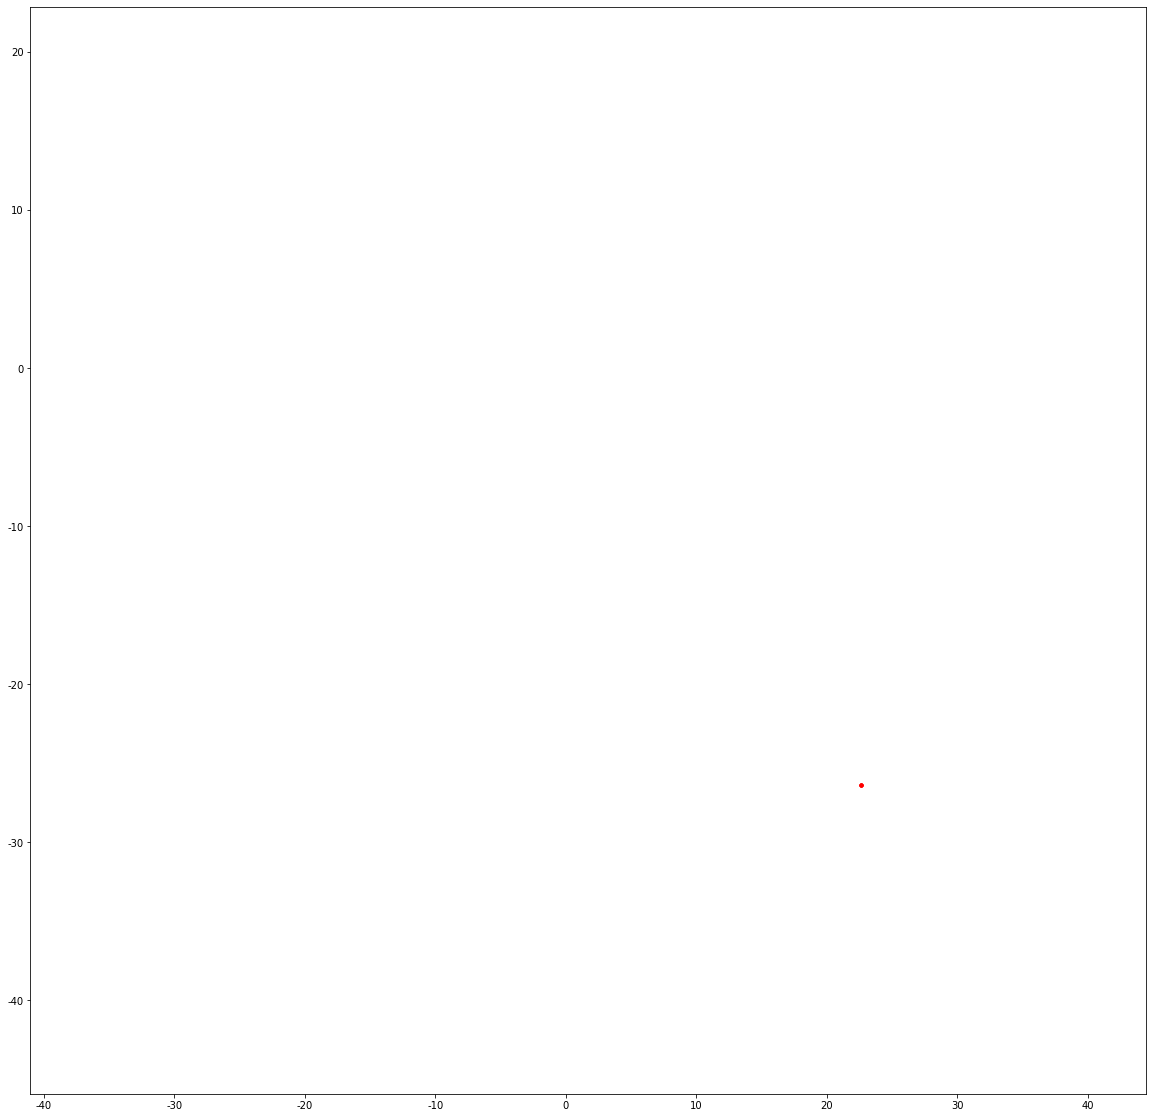

In [368]:
plt.figure(figsize=(20,20))
plt.xlim(data_tsne[:,0].min(), data_tsne[:,0].max()+1)
plt.ylim(data_tsne[:,1].min(), data_tsne[:,1].max()+1)

size = 10
for i in range(len(data)):
    if topics_num[i] == 10:
        color = '#ff0000'
        plt.scatter(data_tsne[i,0], data_tsne[i,1], c=color, s=size)
        
    # plt.scatter(data_tsne[i,0], data_tsne[i,1], c=color, s=size)
plt.show()

In [440]:
print(word_count_and_tf_idf_similarity(communities_10, 10))

[('life', 2.75),
 ('year', 2.25),
 ('today', 2.0),
 ('think', 1.75),
 ('need', 1.5),
 ('one', 1.5),
 ('hate', 1.5),
 ('anxiety', 1.25),
 ('thought', 1.25),
 ('first', 1.25),
 ('depression', 1.25),
 ('friend', 1.25),
 ('time', 1.25),
 ('stop', 1.0),
 ('depressed', 1.0),
 ('day', 1.0),
 ('even', 1.0),
 ('talk', 1.0),
 ('love', 1.0),
 ('tell', 1.0),
 ('go', 1.0),
 ('wish', 1.0),
 ('alone', 1.0),
 ('cry', 1.0),
 ('dae', 1.0),
 ('kill', 1.0),
 ('sleep', 0.75),
 ('advice', 0.75),
 ('best', 0.75),
 ('care', 0.75),
 ('lost', 0.75),
 ('better', 0.75),
 ('old', 0.75),
 ('suicide', 0.75),
 ('this', 0.75),
 ('finally', 0.75),
 ('mom', 0.75),
 ('therapist', 0.75),
 ('wrong', 0.75),
 ('relationship', 0.75),
 ('work', 0.75),
 ('sad', 0.75),
 ('suicidal', 0.75),
 ('job', 0.75),
 ('right', 0.75),
 ('parent', 0.75),
 ('feeling', 0.75),
 ('you', 0.75),
 ('therapy', 0.75),
 ('mental', 0.75),
 ('made', 0.75),
 ('week', 0.75),
 ('person', 0.75),
 ('fuck', 0.75),
 ('birthday', 0.75),
 ('tired', 0.75),
 ('cou

## topic_nums = 5 (members >= 1000)

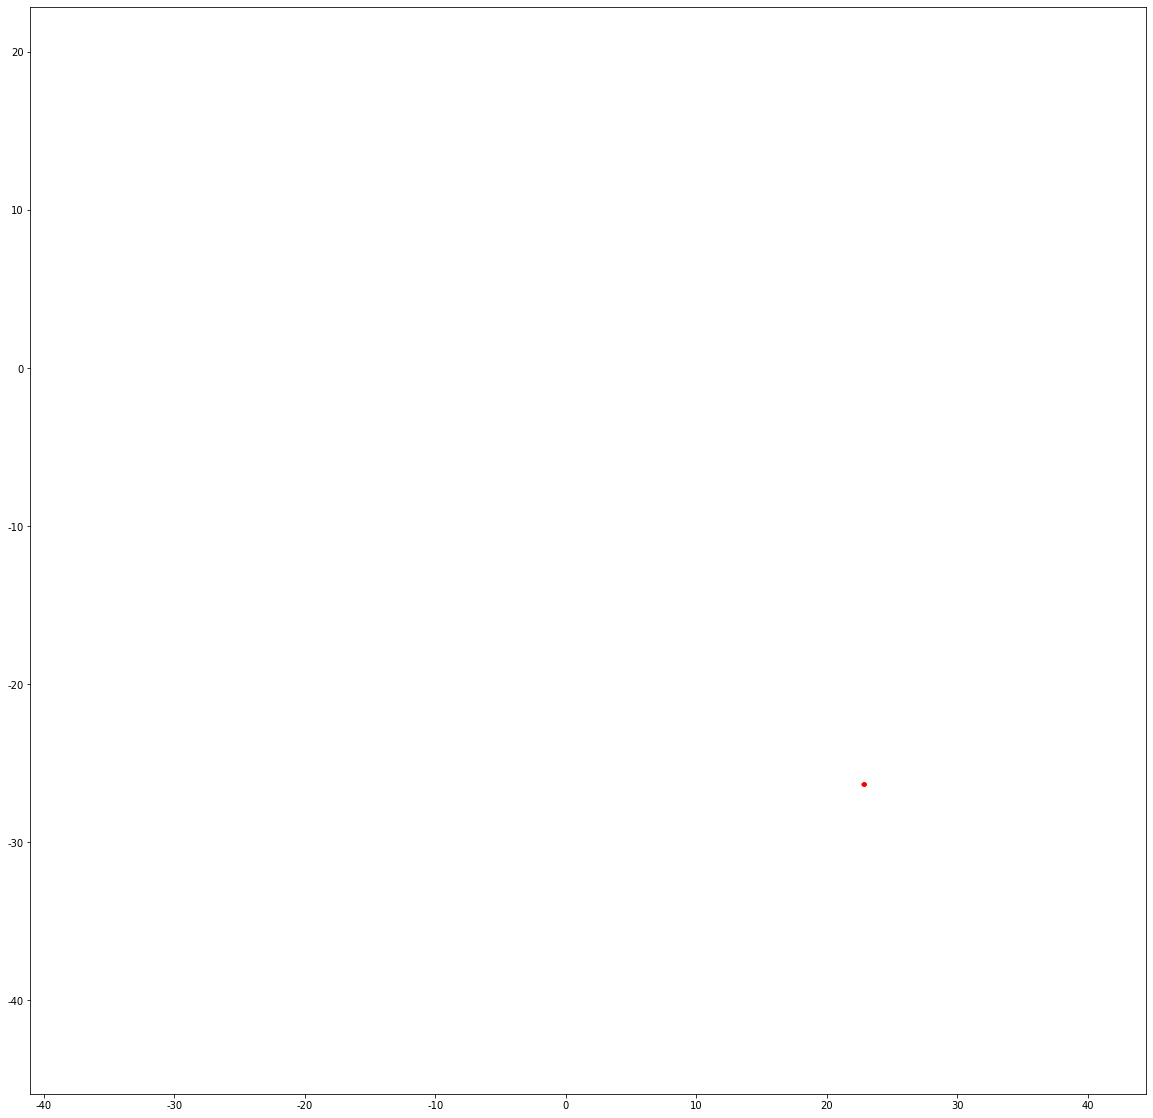

In [367]:
plt.figure(figsize=(20,20))
plt.xlim(data_tsne[:,0].min(), data_tsne[:,0].max()+1)
plt.ylim(data_tsne[:,1].min(), data_tsne[:,1].max()+1)

size = 10
for i in range(len(data)):
    if topics_num[i] == 5:
        color = '#ff0000'
        plt.scatter(data_tsne[i,0], data_tsne[i,1], c=color, s=size)

plt.show()

In [441]:
word_count_and_tf_idf_similarity(communities_5, 5)

[('friend', 2.0),
 ('need', 1.8),
 ('life', 1.6),
 ('think', 1.6),
 ('depression', 1.4),
 ('time', 1.4),
 ('suicide', 1.2),
 ('today', 1.2),
 ('year', 1.2),
 ('kill', 1.2),
 ('advice', 1.0),
 ('one', 1.0),
 ('day', 1.0),
 ('angry', 1.0),
 ('go', 1.0),
 ('hate', 1.0),
 ('anger', 1.0),
 ('bullied', 0.8),
 ('stop', 0.8),
 ('bully', 0.8),
 ('bullying', 0.8),
 ('depressed', 0.8),
 ('feeling', 0.8),
 ('anxiety', 0.6),
 ('die', 0.6),
 ('suicidal', 0.6),
 ('thought', 0.6),
 ('fuck', 0.6),
 ('lost', 0.4),
 ('this', 0.4),
 ('month', 0.4),
 ('hurt', 0.4),
 ('harm', 0.4),
 ('existential', 0.4),
 ('say', 0.4),
 ('sad', 0.4),
 ('much', 0.4),
 ('school', 0.4),
 ('living', 0.4),
 ('end', 0.4),
 ('person', 0.4),
 ('crisis', 0.4),
 ('tired', 0.4),
 ('lonely', 0.4),
 ('find', 0.4),
 ('clean', 0.4),
 ('guy', 0.4),
 ('death', 0.2),
 ('mad', 0.2),
 ('universe', 0.2),
 ('stand', 0.2),
 ('music', 0.2),
 ('never', 0.2),
 ('killing', 0.2),
 ('care', 0.2),
 ('still', 0.2),
 ('everyone', 0.2),
 ('legit', 0.2),
 (

## topic_nums = 4 (members >= 100)

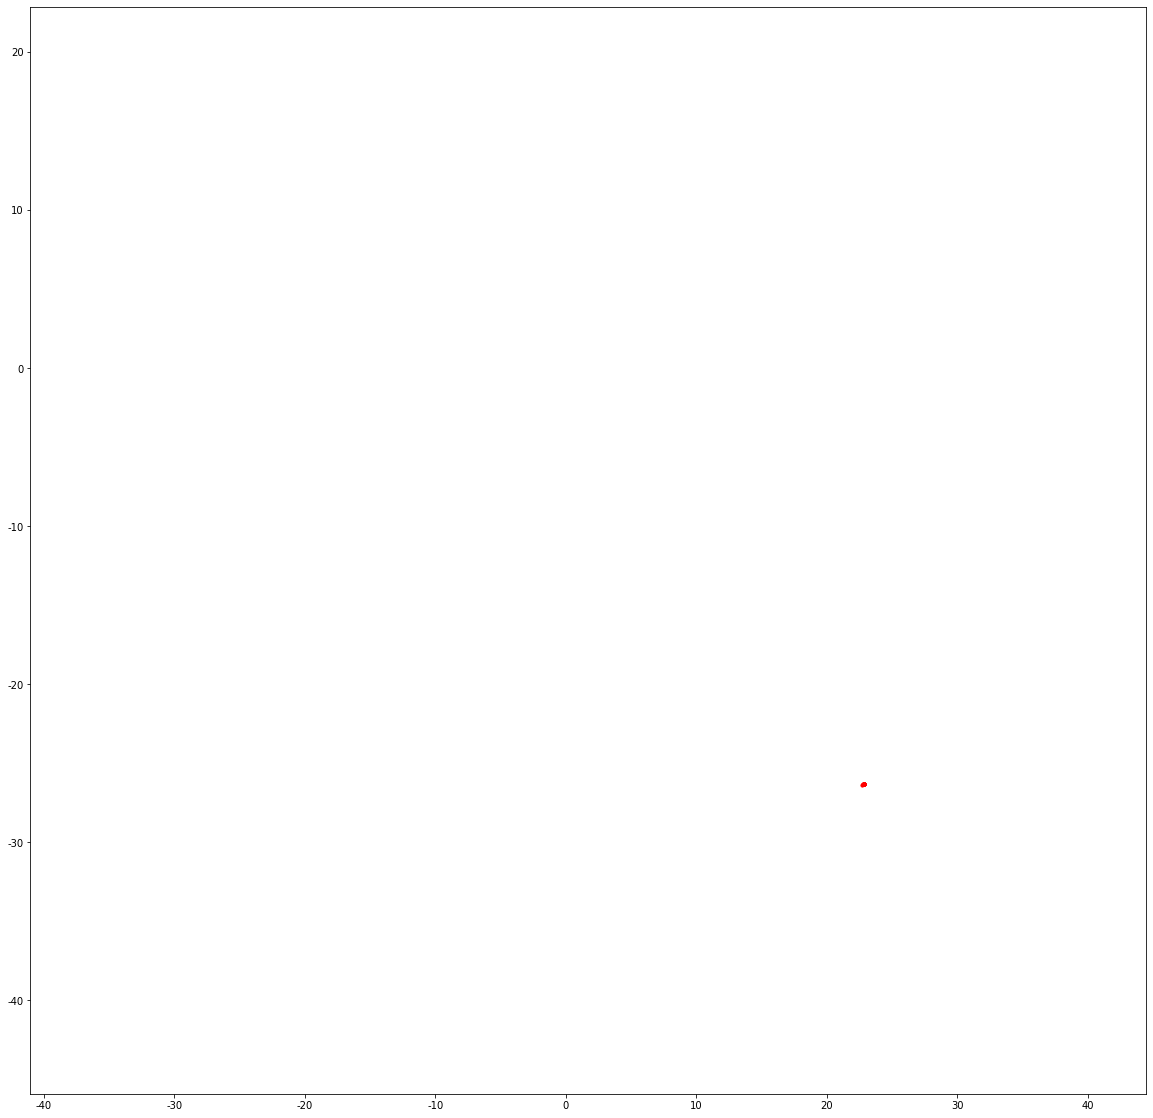

In [310]:
plt.figure(figsize=(20,20))
plt.xlim(data_tsne[:,0].min(), data_tsne[:,0].max()+1)
plt.ylim(data_tsne[:,1].min(), data_tsne[:,1].max()+1)

size = 10
for i in range(len(data)):
    if topics_num[i] == 4:
        color = '#ff0000'
        plt.scatter(data_tsne[i,0], data_tsne[i,1], c=color, s=size)
        
    # plt.scatter(data_tsne[i,0], data_tsne[i,1], c=color, s=size)
plt.show()

In [443]:
print(word_count_and_tf_idf_similarity(communities_4, 4))

[('need', 1.3571), ('depression', 1.3571), ('life', 1.2143), ('depressed', 0.8571), ('friend', 0.7857), ('hate', 0.7143), ('one', 0.6429), ('talk', 0.6429), ('think', 0.6429), ('year', 0.6429), ('kill', 0.6429), ('die', 0.5714), ('time', 0.5714), ('stop', 0.5), ('anxiety', 0.5), ('suicide', 0.5), ('today', 0.5), ('thought', 0.5), ('tired', 0.5), ('better', 0.4286), ('day', 0.4286), ('alone', 0.4286), ('feeling', 0.4286), ('advice', 0.3571), ('never', 0.3571), ('go', 0.3571), ('much', 0.3571), ('end', 0.3571), ('way', 0.3571), ('give', 0.3571), ('care', 0.2857), ('lost', 0.2857), ('back', 0.2857), ('nothing', 0.2857), ('ive', 0.2857), ('hair', 0.2857), ('first', 0.2857), ('old', 0.2143), ('even', 0.2143), ('tonight', 0.2143), ('work', 0.2143), ('sad', 0.2143), ('worse', 0.2143), ('cry', 0.2143), ('therapy', 0.2143), ('made', 0.2143), ('actually', 0.2143), ('alive', 0.2143), ('birthday', 0.2143), ('lonely', 0.2143), ('scared', 0.2143), ('best', 0.1429), ('idk', 0.1429), ('killing', 0.142

## topic_nums = 3 (members >= 10)

# 3-1)

In [264]:
communities_3 = []

for i in range(len(data)):
    if topics_num[i] == 3:
        communities_3.append(filenames[i])

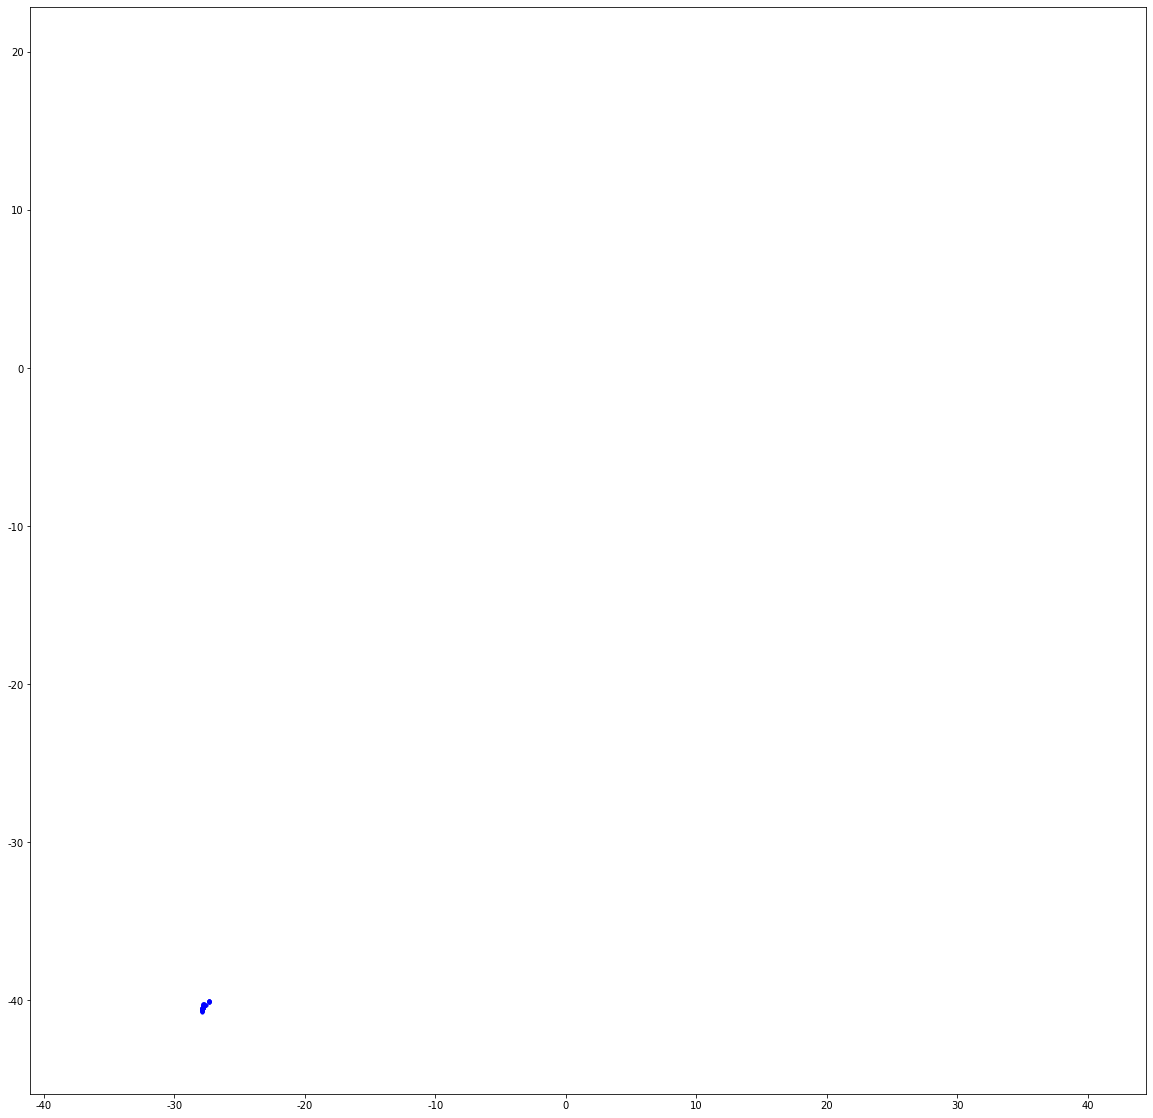

In [372]:
communities_3_1 = []

plt.figure(figsize=(20,20))
plt.xlim(data_tsne[:,0].min(), data_tsne[:,0].max()+1)
plt.ylim(data_tsne[:,1].min(), data_tsne[:,1].max()+1)

color = 'b'

for i in range(len(data)):
    if topics_num[i] == 3:
        if data_tsne[i,0] > -30 and data_tsne[i,0] < -20 and data_tsne[i,1] < -20:
            plt.scatter(data_tsne[i,0], data_tsne[i,1], c=color, s=size)
            communities_3_1.append(filenames[i])

# 3-2)

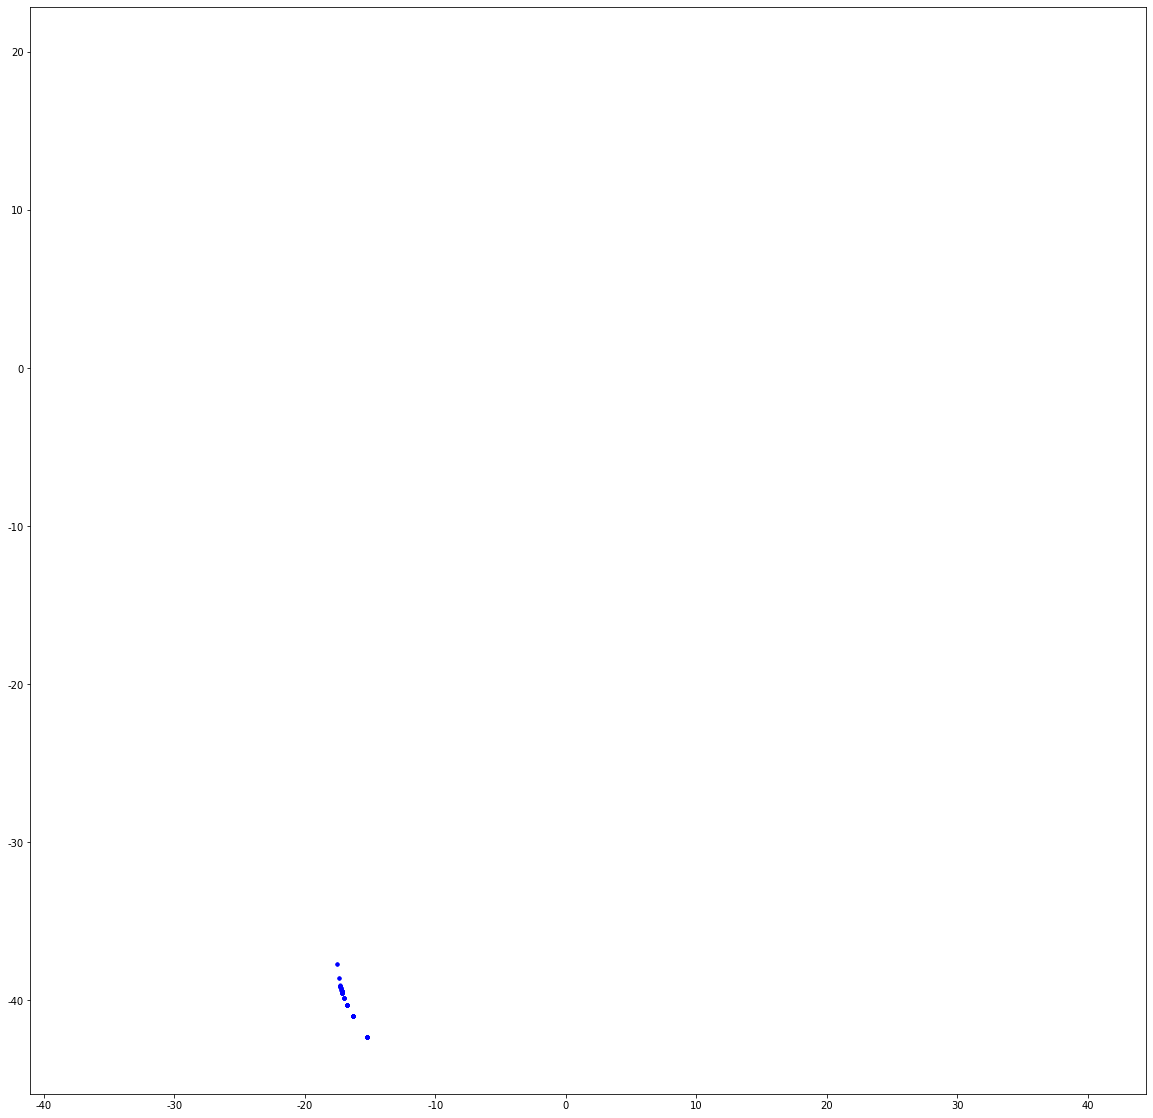

In [373]:
communities_3_2 = []

plt.figure(figsize=(20,20))
plt.xlim(data_tsne[:,0].min(), data_tsne[:,0].max()+1)
plt.ylim(data_tsne[:,1].min(), data_tsne[:,1].max()+1)

for i in range(len(data)):
    if topics_num[i] == 3:
        if data_tsne[i,0] > -20 and data_tsne[i,0] < -12:
            plt.scatter(data_tsne[i,0], data_tsne[i,1], c=color, s=size)
            communities_3_2.append(filenames[i])

# 3-3)

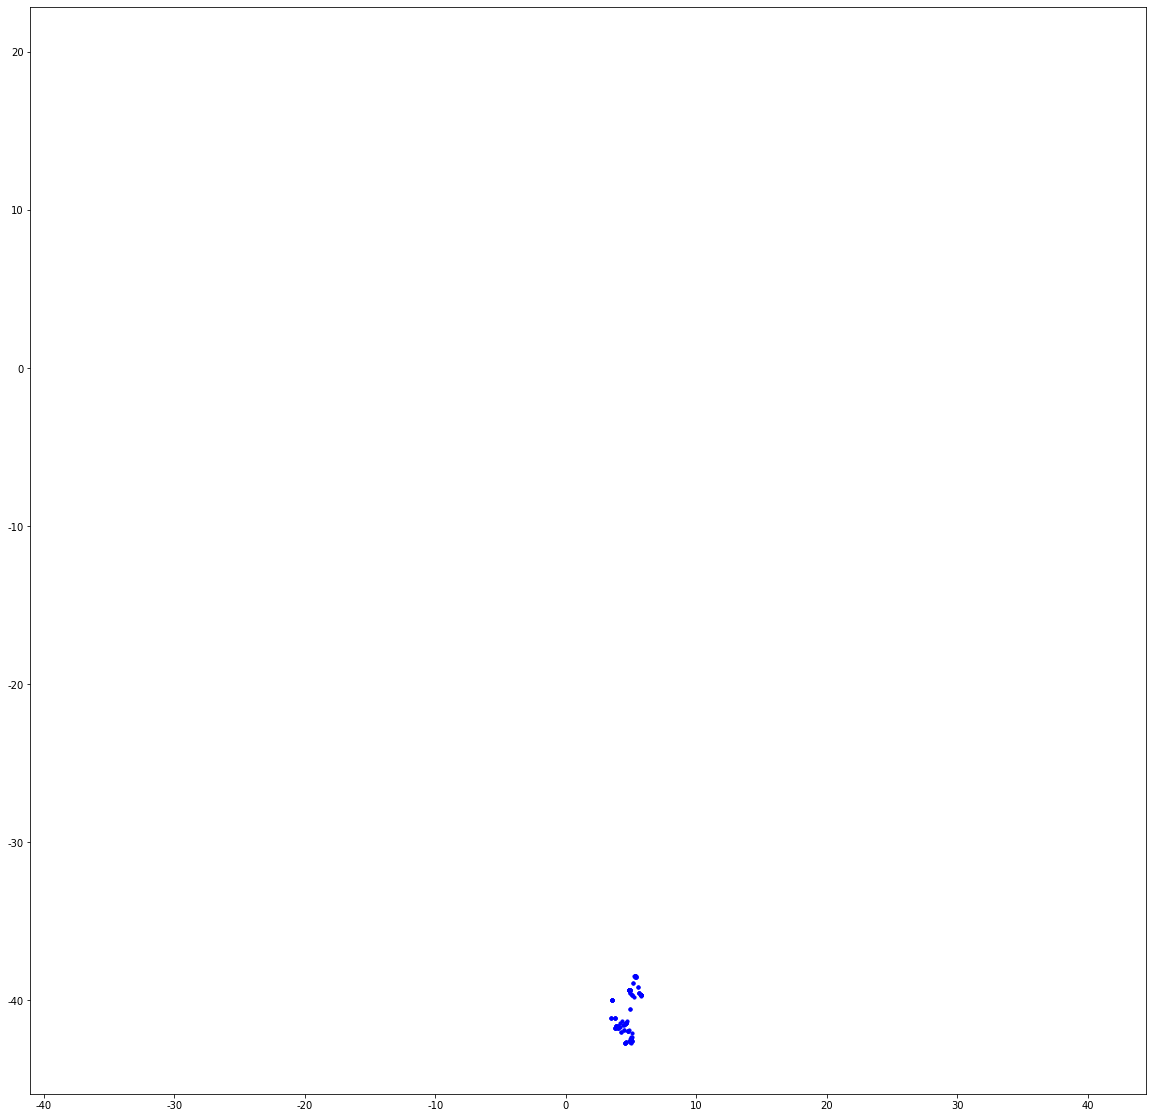

In [374]:
communities_3_3 = []

plt.figure(figsize=(20,20))
plt.xlim(data_tsne[:,0].min(), data_tsne[:,0].max()+1)
plt.ylim(data_tsne[:,1].min(), data_tsne[:,1].max()+1)

for i in range(len(data)):
    if topics_num[i] == 3:
        if data_tsne[i,0] > 0 and data_tsne[i,0] < 10 and data_tsne[i,1] < -20:
            plt.scatter(data_tsne[i,0], data_tsne[i,1], c=color, s=size)
            communities_3_3.append(filenames[i])

# 3-4)

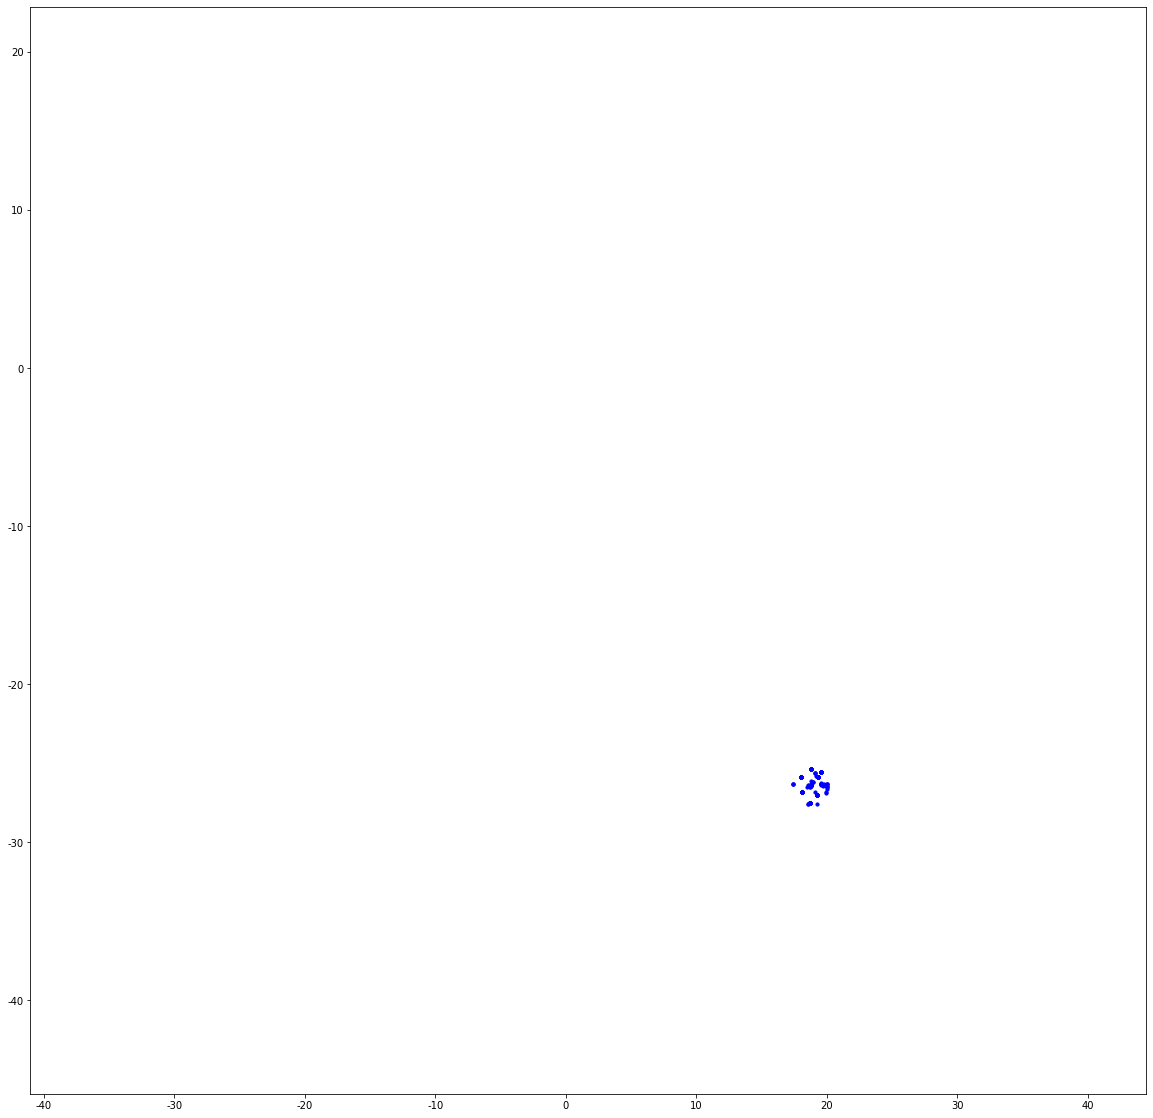

In [375]:
communities_3_4 = []

plt.figure(figsize=(20,20))
plt.xlim(data_tsne[:,0].min(), data_tsne[:,0].max()+1)
plt.ylim(data_tsne[:,1].min(), data_tsne[:,1].max()+1)

for i in range(len(data)):
    if topics_num[i] == 3:
        if data_tsne[i,1] > -30 and data_tsne[i,1] < -20:
            plt.scatter(data_tsne[i,0], data_tsne[i,1], c=color, s=size)
            communities_3_4.append(filenames[i])

In [448]:
idx = 1

for count in zip(word_count_and_tf_idf_similarity(communities_3_1, 3), word_count_and_tf_idf_similarity(communities_3_2, 3), 
                word_count_and_tf_idf_similarity(communities_3_3, 3), word_count_and_tf_idf_similarity(communities_3_4, 3)):
    print(f'{idx}: {count}')
    print()
    idx += 1

1: (('need', 0.5375), ('life', 0.495), ('life', 0.5111), ('life', 0.4281))

2: (('life', 0.525), ('need', 0.4158), ('depression', 0.4222), ('depression', 0.3028))

3: (('depression', 0.4125), ('die', 0.4158), ('need', 0.3611), ('need', 0.2936))

4: (('friend', 0.375), ('hate', 0.3465), ('friend', 0.3444), ('friend', 0.2875))

5: (('hate', 0.35), ('kill', 0.3366), ('year', 0.3111), ('think', 0.2385))

6: (('time', 0.3375), ('talk', 0.2871), ('think', 0.2889), ('kill', 0.2355))

7: (('talk', 0.3), ('lonely', 0.2772), ('day', 0.2778), ('depressed', 0.2232))

8: (('kill', 0.2875), ('depression', 0.2673), ('die', 0.2611), ('die', 0.2232))

9: (('think', 0.275), ('think', 0.2475), ('feeling', 0.2611), ('feeling', 0.2171))

10: (('year', 0.2625), ('birthday', 0.2475), ('today', 0.2444), ('year', 0.2171))

11: (('one', 0.25), ('alone', 0.2277), ('kill', 0.2444), ('one', 0.208))

12: (('today', 0.25), ('anxiety', 0.2178), ('time', 0.2278), ('time', 0.2018))

13: (('anxiety', 0.25), ('friend', 0

## topic_nums = 1 (members < 10)

# 1-1)

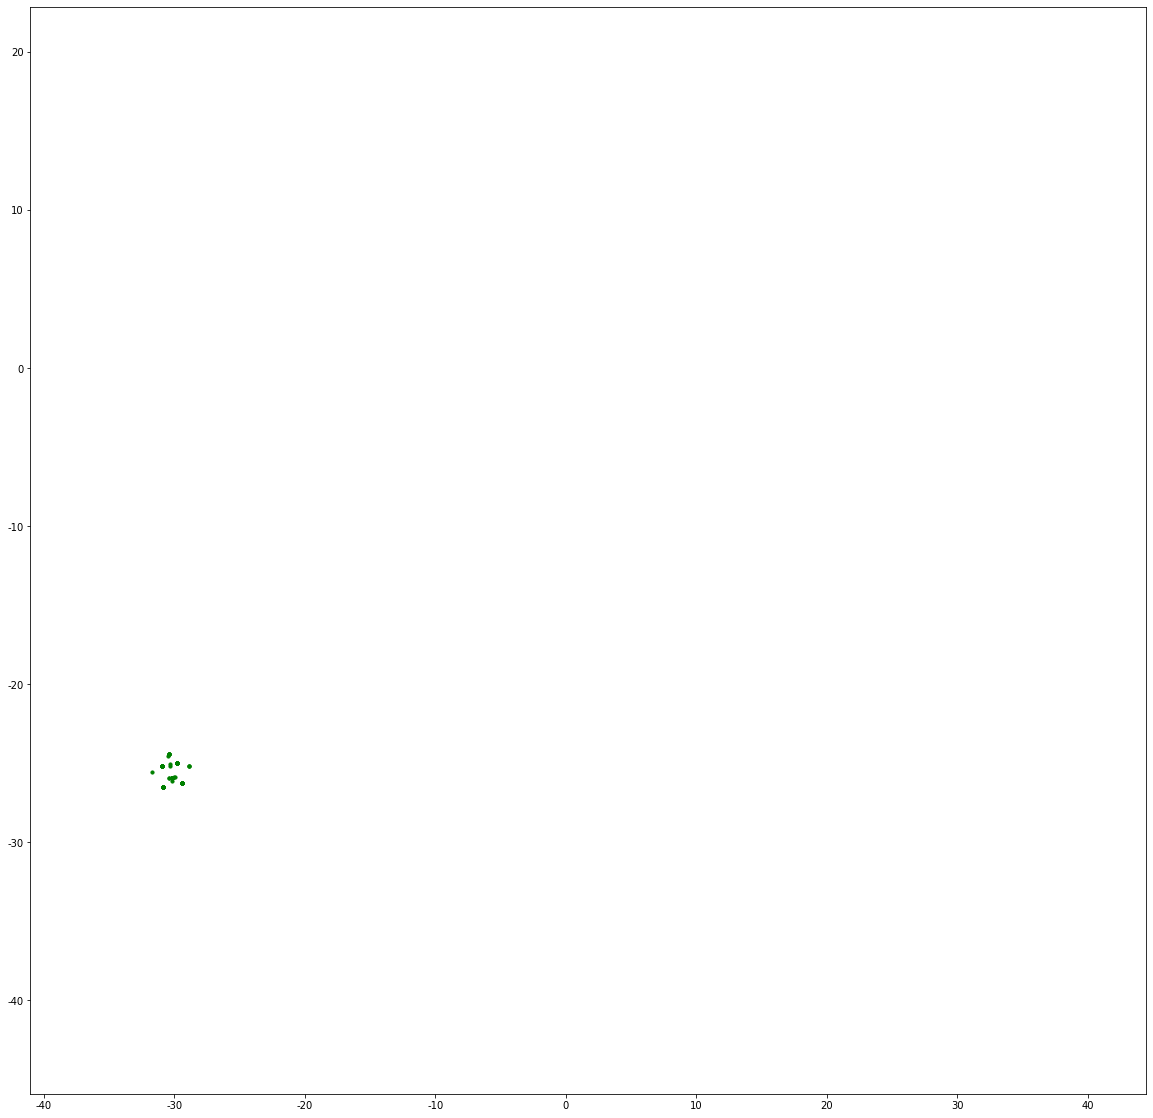

In [377]:
communities_1_1 = []

plt.figure(figsize=(20,20))
plt.xlim(data_tsne[:,0].min(), data_tsne[:,0].max()+1)
plt.ylim(data_tsne[:,1].min(), data_tsne[:,1].max()+1)

color = 'g'

for i in range(len(data)):
    if topics_num[i] == 1:
        if data_tsne[i,0] > -35 and data_tsne[i,0] < -28:
            plt.scatter(data_tsne[i,0], data_tsne[i,1], c=color, s=size)
            communities_1_1.append(filenames[i])

# 1-2)

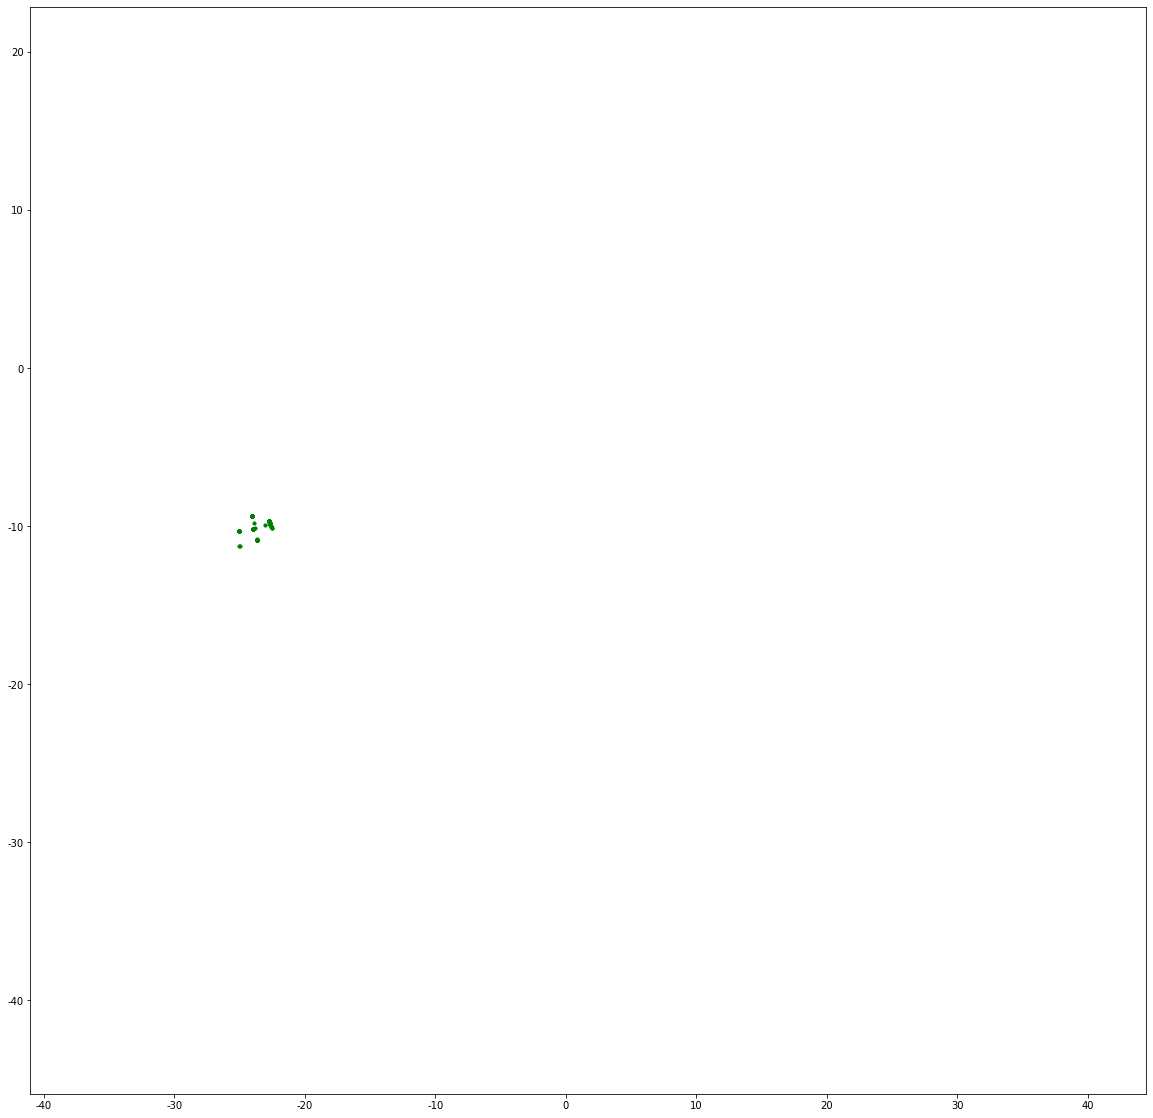

In [378]:
communities_1_2 = []

plt.figure(figsize=(20,20))
plt.xlim(data_tsne[:,0].min(), data_tsne[:,0].max()+1)
plt.ylim(data_tsne[:,1].min(), data_tsne[:,1].max()+1)

for i in range(len(data)):
    if topics_num[i] == 1:
        if data_tsne[i,0] > -28 and data_tsne[i,0] < -20:
            plt.scatter(data_tsne[i,0], data_tsne[i,1], c=color, s=size)
            communities_1_2.append(filenames[i])

# 1-3)

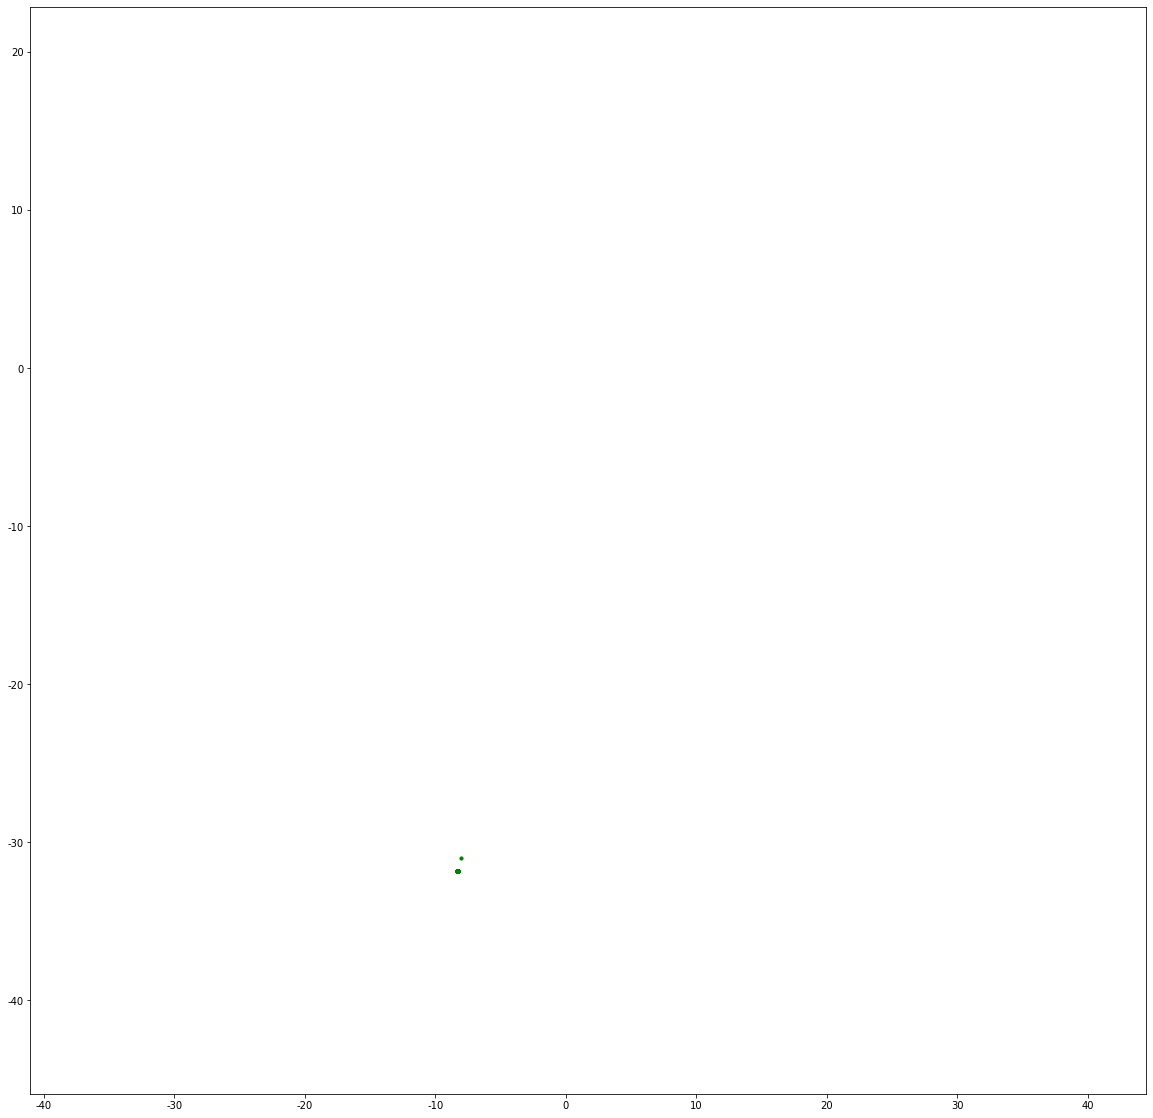

In [379]:
communities_1_3 = []

plt.figure(figsize=(20,20))
plt.xlim(data_tsne[:,0].min(), data_tsne[:,0].max()+1)
plt.ylim(data_tsne[:,1].min(), data_tsne[:,1].max()+1)

for i in range(len(data)):
    if topics_num[i] == 1:
        if data_tsne[i,0] > -12 and data_tsne[i,0] < -5 and data_tsne[i,1] < -30:
            plt.scatter(data_tsne[i,0], data_tsne[i,1], c=color, s=size)
            communities_1_3.append(filenames[i])

# 1-4)

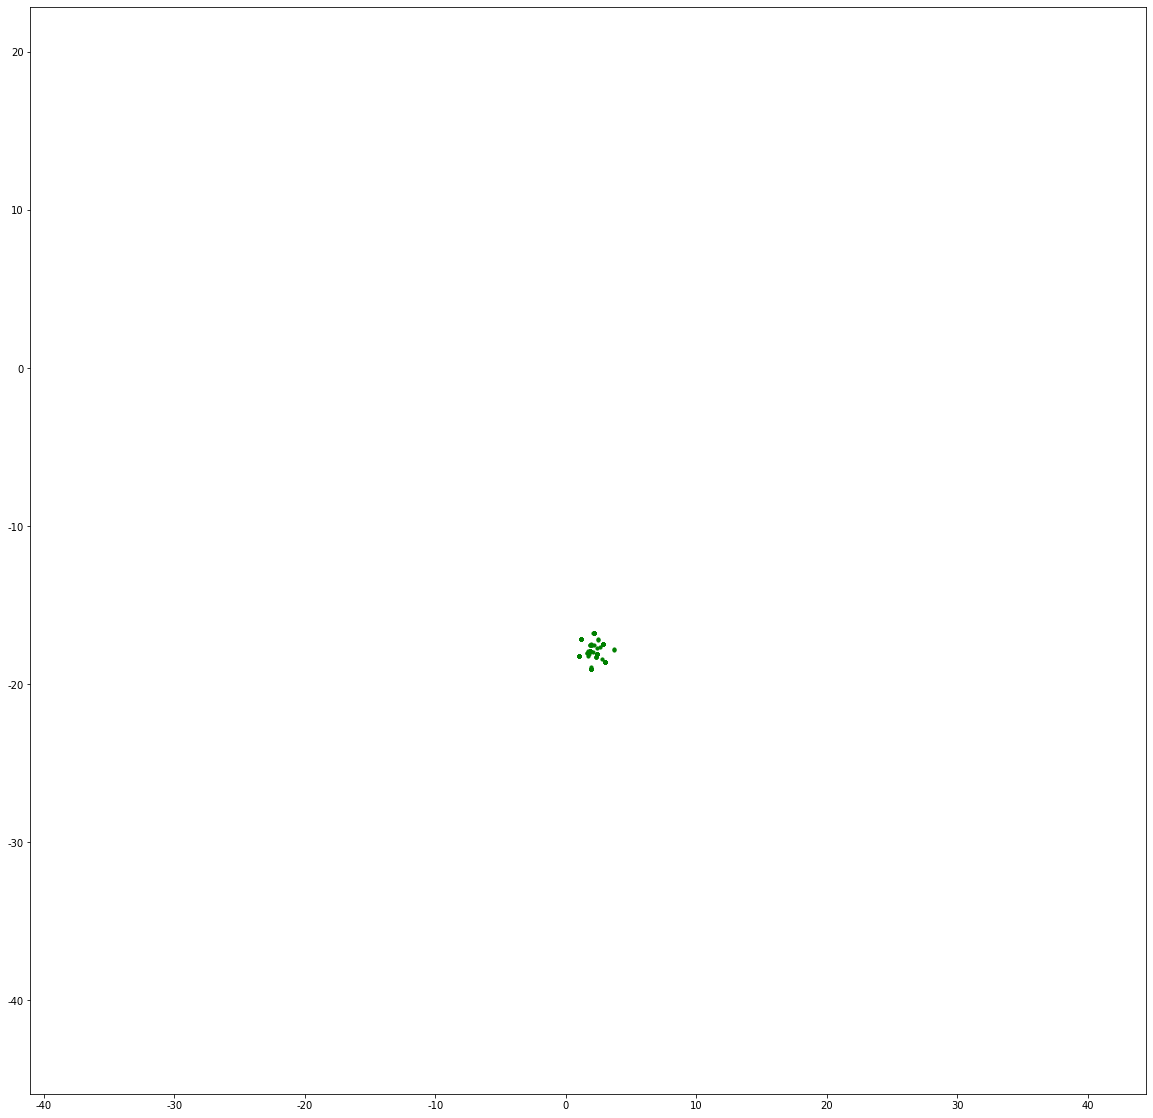

In [380]:
communities_1_4 = []

plt.figure(figsize=(20,20))
plt.xlim(data_tsne[:,0].min(), data_tsne[:,0].max()+1)
plt.ylim(data_tsne[:,1].min(), data_tsne[:,1].max()+1)

for i in range(len(data)):
    if topics_num[i] == 1:
        if data_tsne[i,0] > -0 and data_tsne[i,0] < 10 and data_tsne[i,1] < -10 and data_tsne[i,1] > -20:
            plt.scatter(data_tsne[i,0], data_tsne[i,1], c=color, s=size)
            communities_1_4.append(filenames[i])

# 1-5)

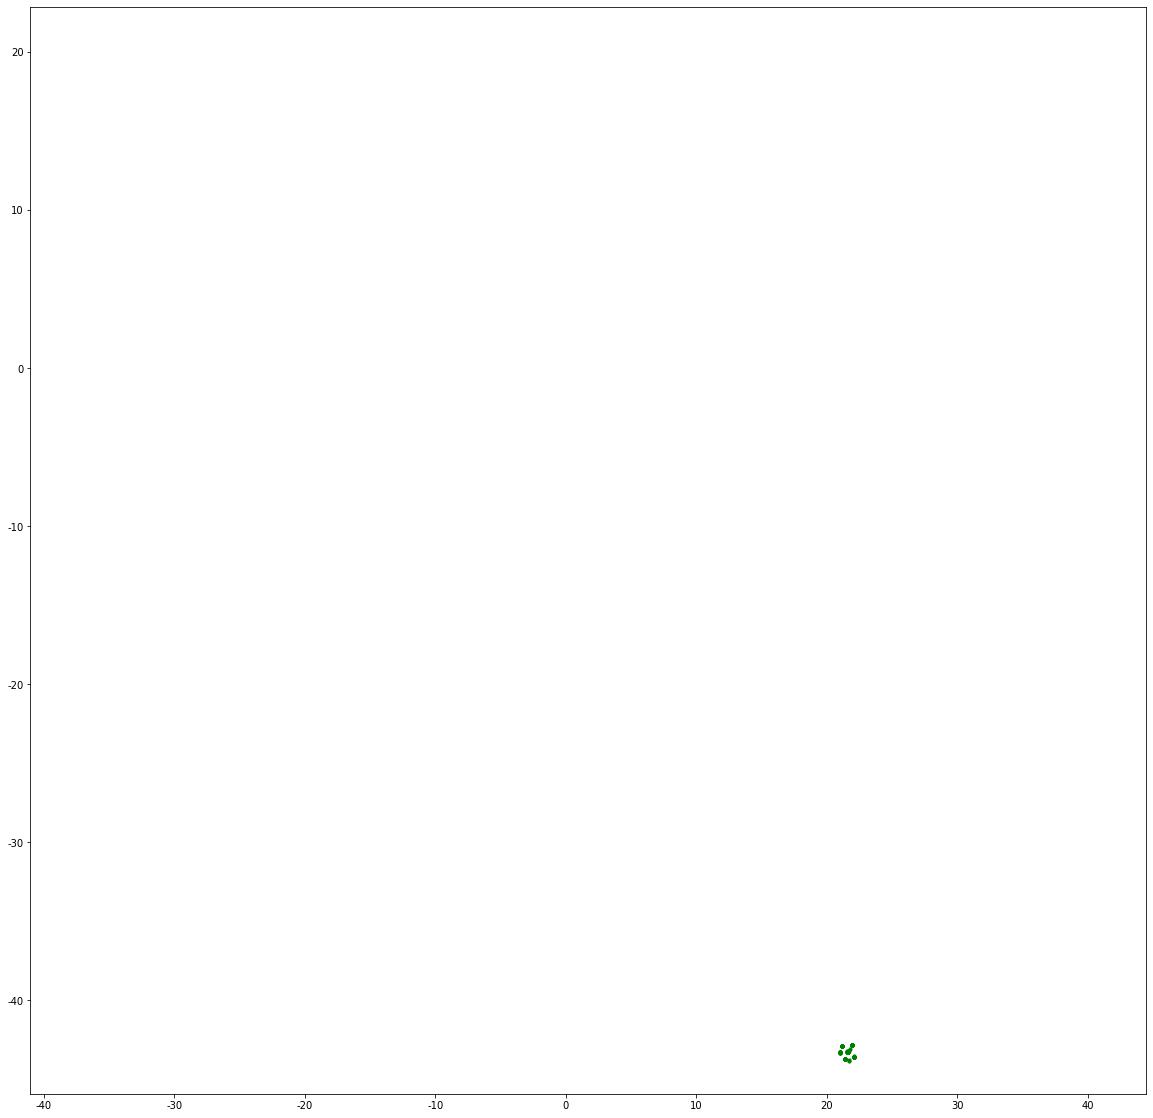

In [381]:
communities_1_5 = []

plt.figure(figsize=(20,20))
plt.xlim(data_tsne[:,0].min(), data_tsne[:,0].max()+1)
plt.ylim(data_tsne[:,1].min(), data_tsne[:,1].max()+1)

for i in range(len(data)):
    if topics_num[i] == 1:
        if data_tsne[i,1] < -40:
            plt.scatter(data_tsne[i,0], data_tsne[i,1], c=color, s=size)
            communities_1_5.append(filenames[i])

In [450]:
idx = 1

for count in zip(word_count_and_tf_idf_similarity(communities_1_1, 1), word_count_and_tf_idf_similarity(communities_1_2, 1), 
                word_count_and_tf_idf_similarity(communities_1_3, 1), word_count_and_tf_idf_similarity(communities_1_4, 1),
                word_count_and_tf_idf_similarity(communities_1_5, 1)):
    print(f'{idx}: {count}')
    print()
    idx += 1

1: (('life', 0.1197), ('friend', 0.064), ('need', 0.0559), ('life', 0.1048), ('need', 0.0429))

2: (('friend', 0.0931), ('need', 0.0613), ('friend', 0.0382), ('need', 0.081), ('die', 0.0429))

3: (('year', 0.0691), ('life', 0.0613), ('life', 0.0324), ('year', 0.0595), ('help', 0.0368))

4: (('need', 0.0638), ('die', 0.0427), ('depressed', 0.0265), ('kill', 0.0595), ('done', 0.0368))

5: (('anxiety', 0.0638), ('kill', 0.04), ('alone', 0.0235), ('friend', 0.0571), ('kill', 0.0368))

6: (('thought', 0.0559), ('depression', 0.04), ('lonely', 0.0235), ('think', 0.0548), ('talk', 0.0184))

7: (('depression', 0.0532), ('time', 0.04), ('talk', 0.0235), ('die', 0.0524), ('goodbye', 0.0184))

8: (('kill', 0.0532), ('alone', 0.0373), ('hate', 0.0235), ('anxiety', 0.05), ('friend', 0.0184))

9: (('talk', 0.0505), ('suicide', 0.0347), ('die', 0.0206), ('day', 0.0476), ('exist', 0.0123))

10: (('day', 0.0479), ('talk', 0.032), ('today', 0.0206), ('depression', 0.0476), ('option', 0.0123))

11: (('th